In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Fundamentalist():
    def __init__(self, a=0, b=0, c=1):
        self.a=a
        self.b=b
        self.c=c
    
    def get_expectation(self, last_price):
        return self.a + self.b * last_price
    
class Naive():
    def __init__(self, a=0, b=1, c=0):
        self.a=a
        self.b=b
        self.c=c
    
    def get_expectation(self, last_price):
        return self.a + self.b * last_price
    
class Adaptive():
    def __init__(self, a=0, b=0, c=0.5, w=0.5, initial_guess=0):
        self.a=a
        self.b=b
        self.c=c
        self.w=w
        
        self.last_expectation = initial_guess
        
    def get_expectation(self, last_price):
        self.last_expectation = self.last_expectation + self.w*(last_price - self.last_expectation)
        return self.last_expectation


class CobWebModel():
    def __init__(self, A=0, d=3/4, s=1, start_price=0, beta=1/2):
        self.A = A
        self.d = d
        self.s = s
        self.beta = beta
        
        self.agents = []
        self.fractions = []
        self.expectations = []
        
        self.prices = [start_price]
        
    def step(self):
        self.expectations.append(self.get_expectations())
        self.prices.append(self.get_new_price())
        self.fractions = self.get_new_fractions()
        
    
    def add_agent(self,agent, fraction):
        self.agents.append(agent)
        self.fractions.append(fraction)
        
    def get_expectations(self):
        return [agent.get_expectation(self.prices[-1]) for agent in self.agents]
        
    def get_new_price(self):
        return -1*(np.sum([self.s*self.fractions[i]*expectation for i, expectation in enumerate(self.expectations[-1])]) - self.A)/self.d
    
    def get_supply(self, expected_price):
        return self.s*expected_price
    
    def get_profit(self, expected_price, agent):
        supply = self.get_supply(expected_price)
        return supply*self.prices[-1] - 0.5*supply**2-agent.c
    
    def get_new_fractions(self):
        profits = [self.get_profit(self.expectations[-1][i], agent) for i,agent in enumerate(self.agents)]
        #print(profits)
        Z = np.sum([np.exp(self.beta*profit) for profit in profits])
        
        
        return [np.exp(self.beta*profit)/Z for profit in profits]

In [3]:
#init for naive and fundamentalist in equal starting fractions

cwmodel = CobWebModel(start_price = 20)

cwmodel.add_agent(Naive(), 0.5)
cwmodel.add_agent(Fundamentalist(), .5)

In [4]:
cwmodel.step()
print(cwmodel.fractions)
print(cwmodel.prices)

[7.616722446670189e-102, 1.0]
[20, -13.333333333333334]


# Question C2

In [5]:
cwmodel = CobWebModel(start_price = 0.1, beta=3, s=1)

cwmodel.add_agent(Naive(), .5)
cwmodel.add_agent(Fundamentalist(), .5)

In [6]:
for i in range(100):
    cwmodel.step()

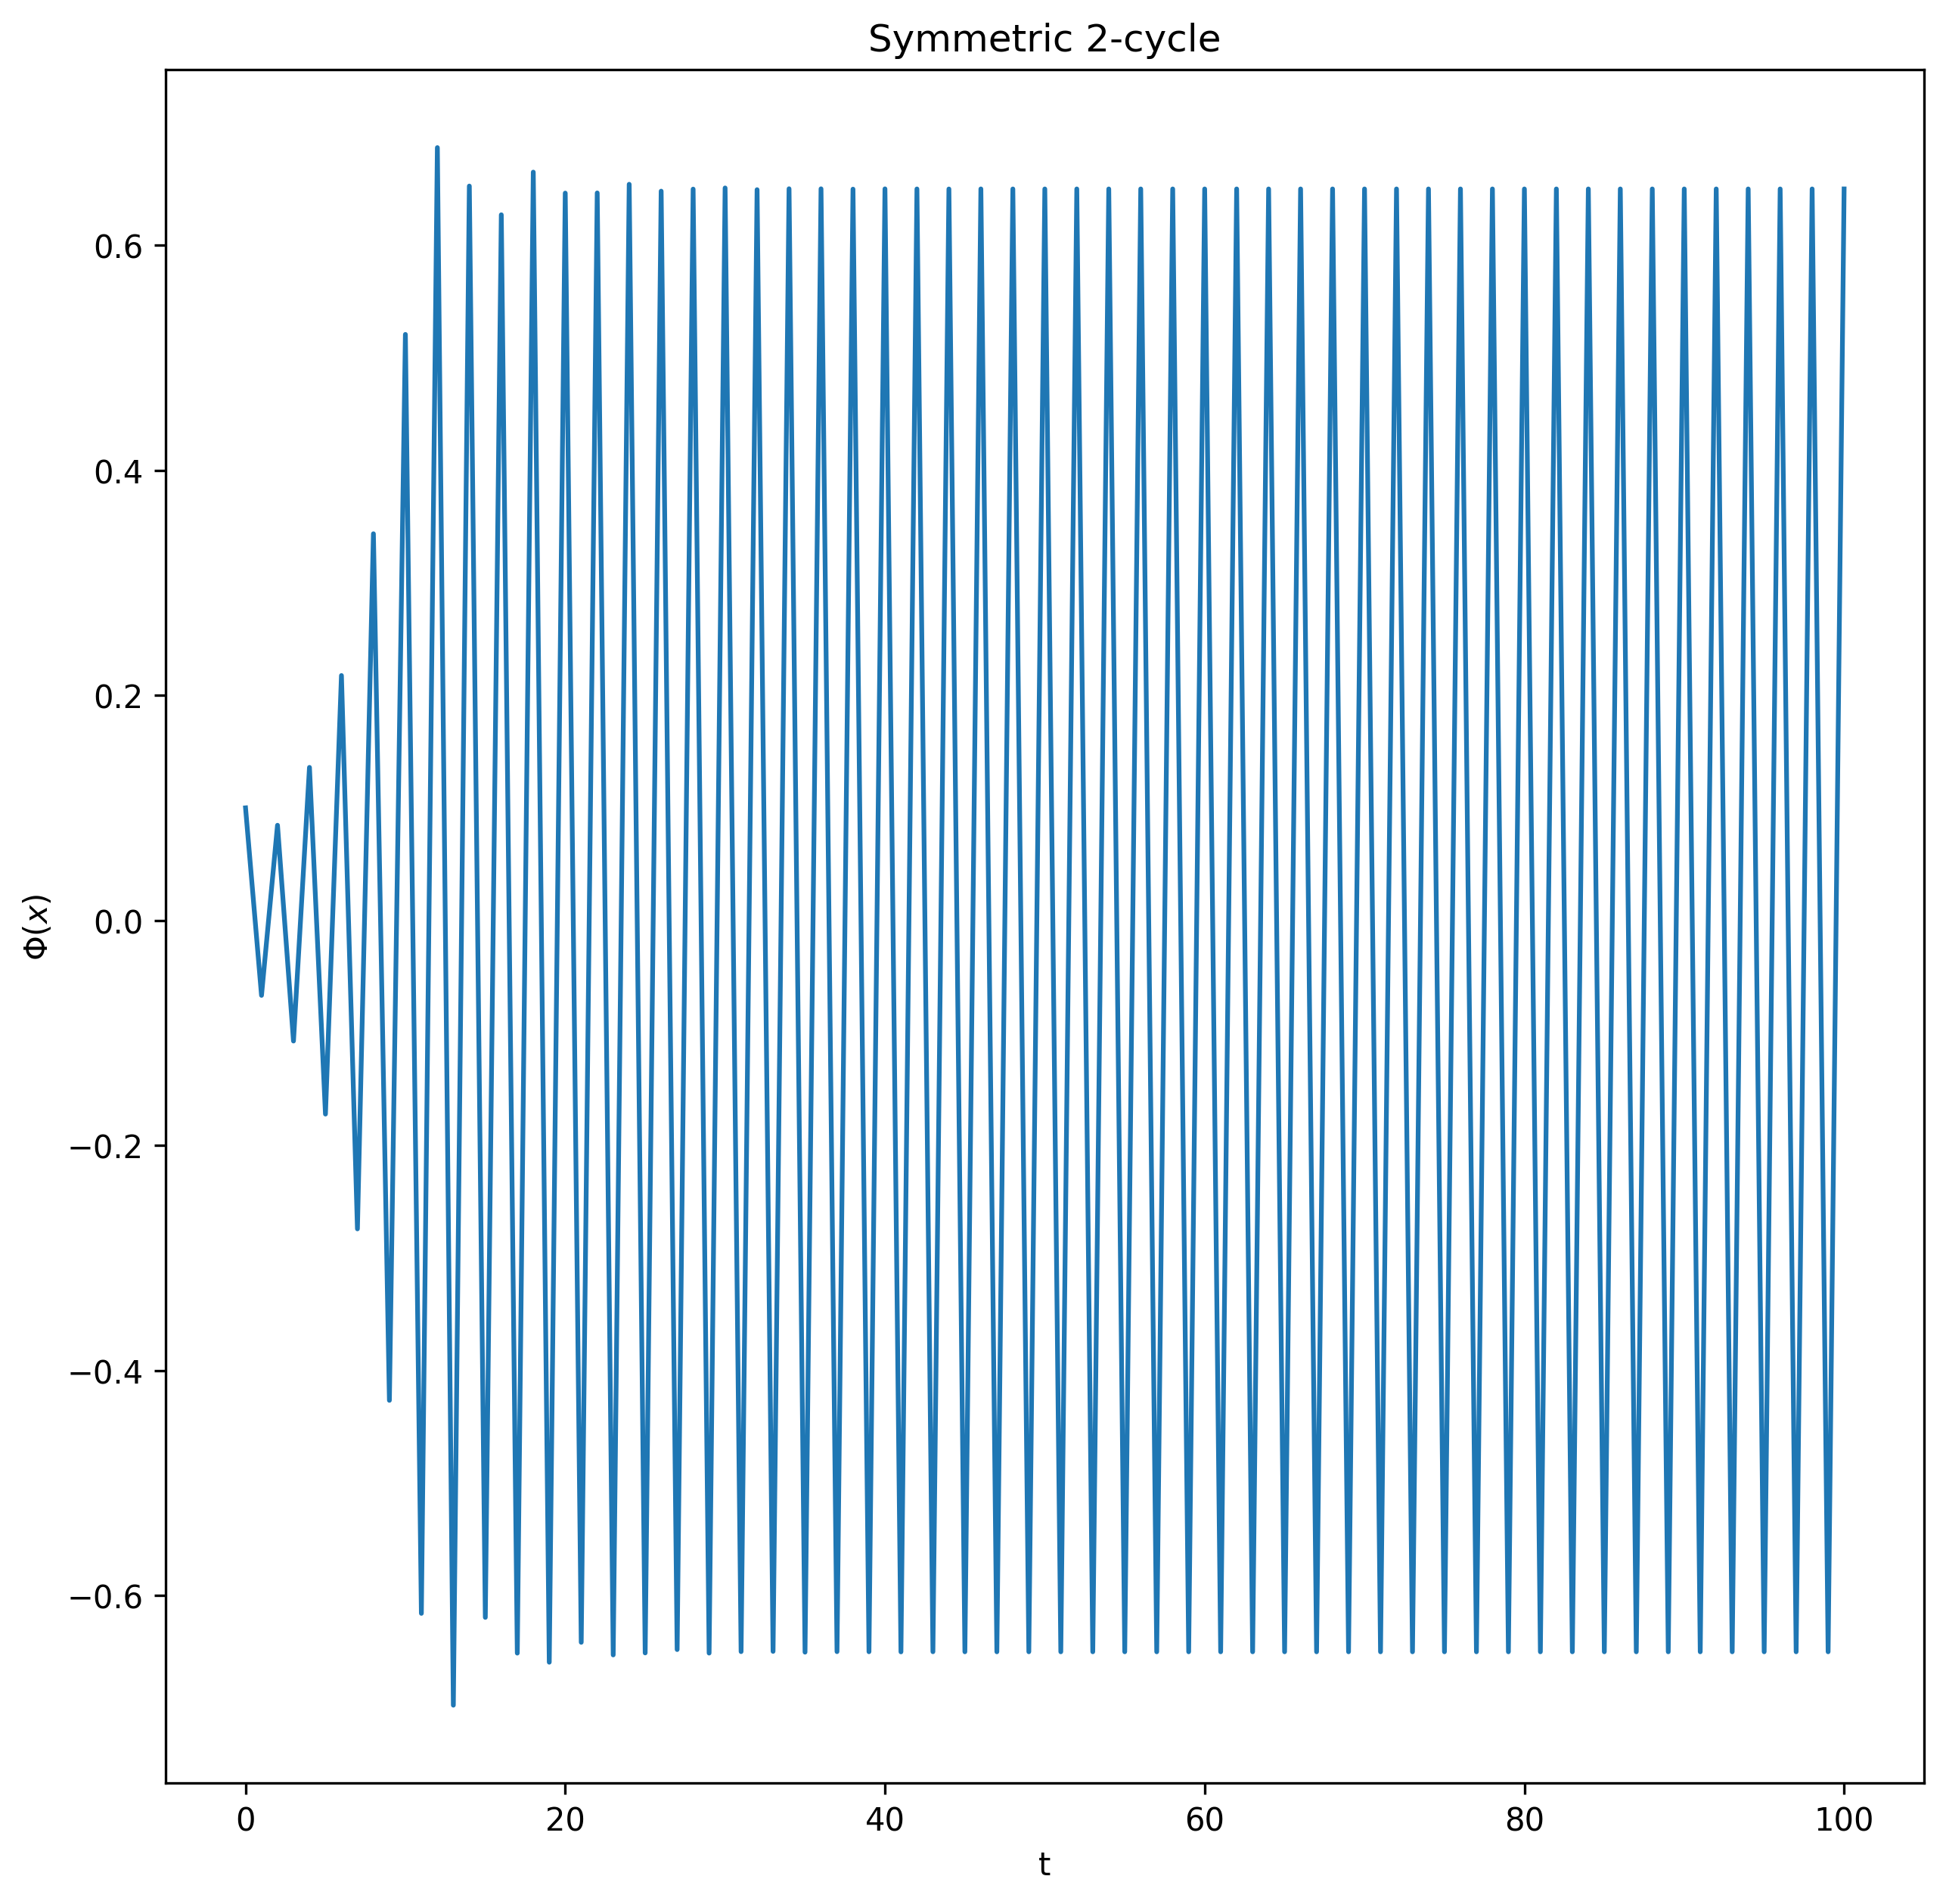

In [12]:
plt.figure(figsize=(10,10), dpi=300)
plt.title('Symmetric 2-cycle')
plt.plot(cwmodel.prices)
plt.xlabel('t')
plt.ylabel('$\Phi(x)$')
plt.savefig('figures_2/c2.png')
plt.show()

# question D

In [21]:
data = []
betas = np.linspace(0,20,1000)
for b in betas:

    cwmodel = CobWebModel(start_price = 0.1, beta=b, s=1)
    cwmodel.add_agent(Naive(), .5)
    cwmodel.add_agent(Fundamentalist(), .5)

    for ii in range(100):
        cwmodel.step()
        
    data.append(cwmodel.prices[-1])

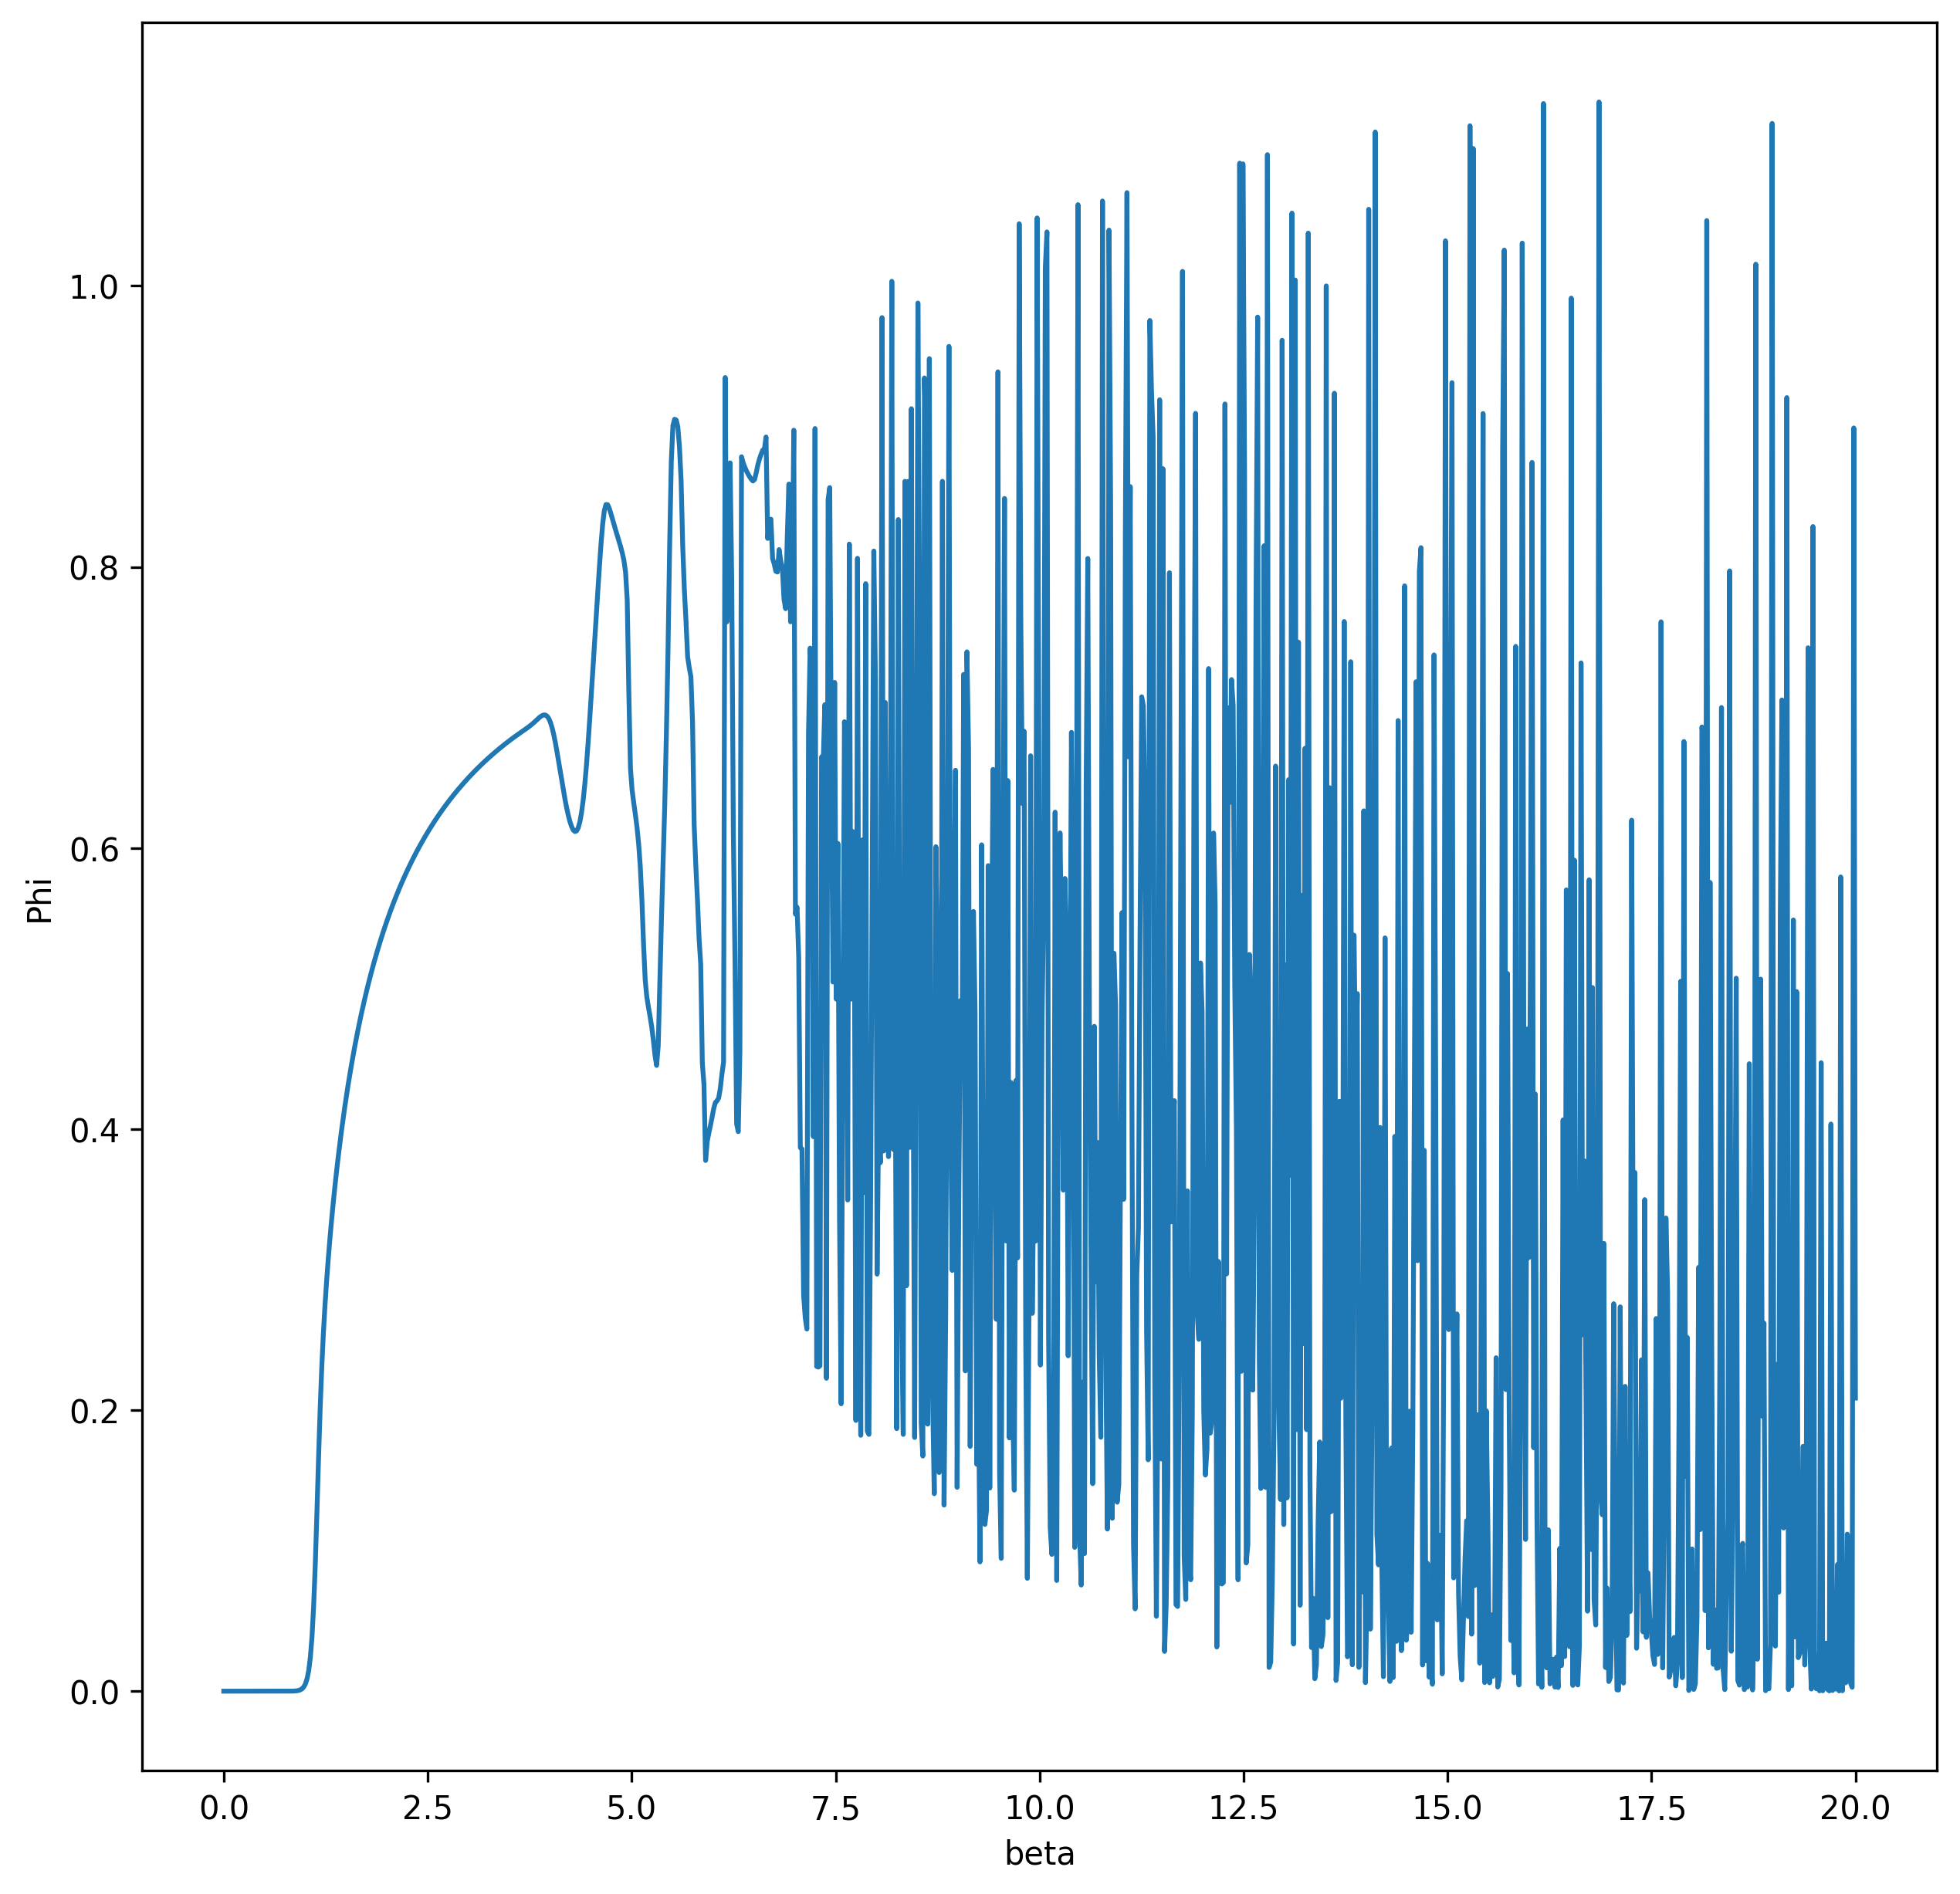

In [22]:
plt.figure(figsize=(10,10), dpi=300)
plt.plot(betas, data)
plt.xlabel('beta')
plt.ylabel('Phi')
plt.savefig('figures_2/d1')
plt.show()

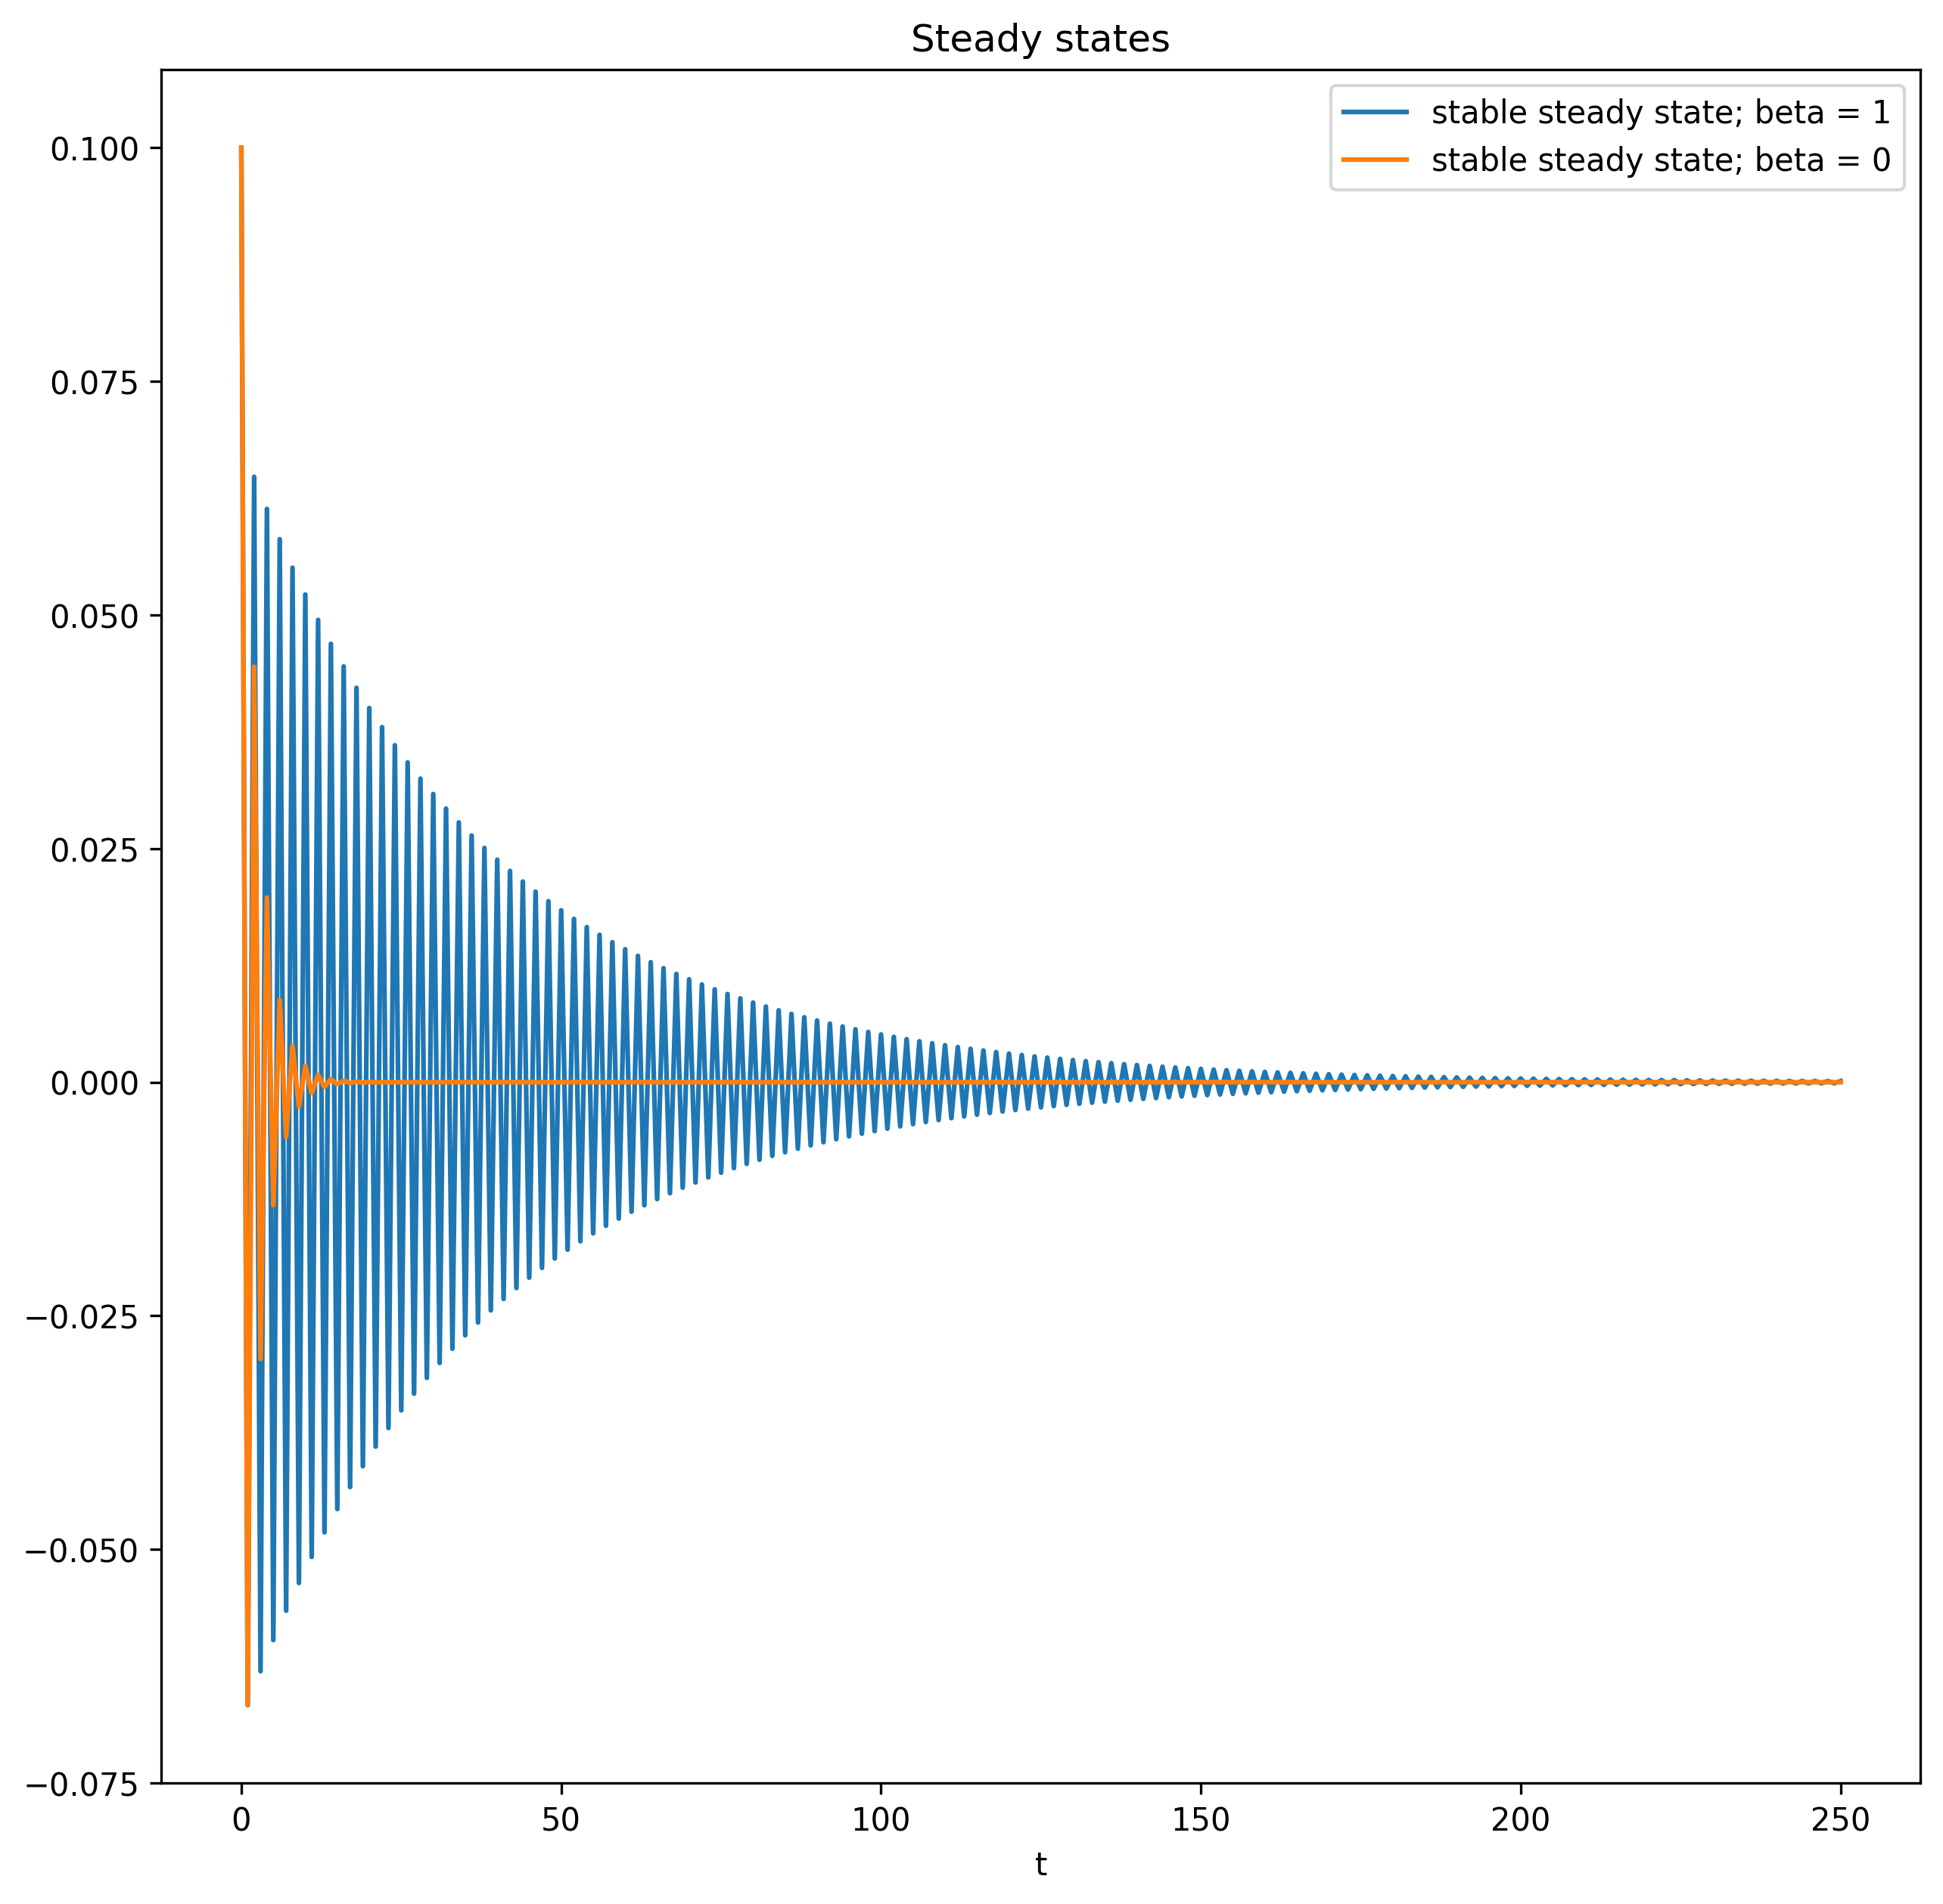

In [7]:
# Stable steady state
cwmodel1 = CobWebModel(start_price = 0.1, beta=1.0, s=1)
cwmodel1.add_agent(Naive(), .5 )
cwmodel1.add_agent(Fundamentalist(), 0.5)

cwmodel2 = CobWebModel(start_price = 0.1, beta=0, s=1)
cwmodel2.add_agent(Naive(), .5)
cwmodel2.add_agent(Fundamentalist(), .5)

for i in range(250):
    cwmodel1.step()
    cwmodel2.step()

plt.figure(figsize=(10,10), dpi=300)
plt.title('Steady states')
plt.plot(cwmodel1.prices, label = 'stable steady state; beta = 1')
plt.plot(cwmodel2.prices, label = 'stable steady state; beta = 0')
plt.legend()
plt.xlabel('t')
plt.savefig('figures_2/d_stable.png')
plt.show()

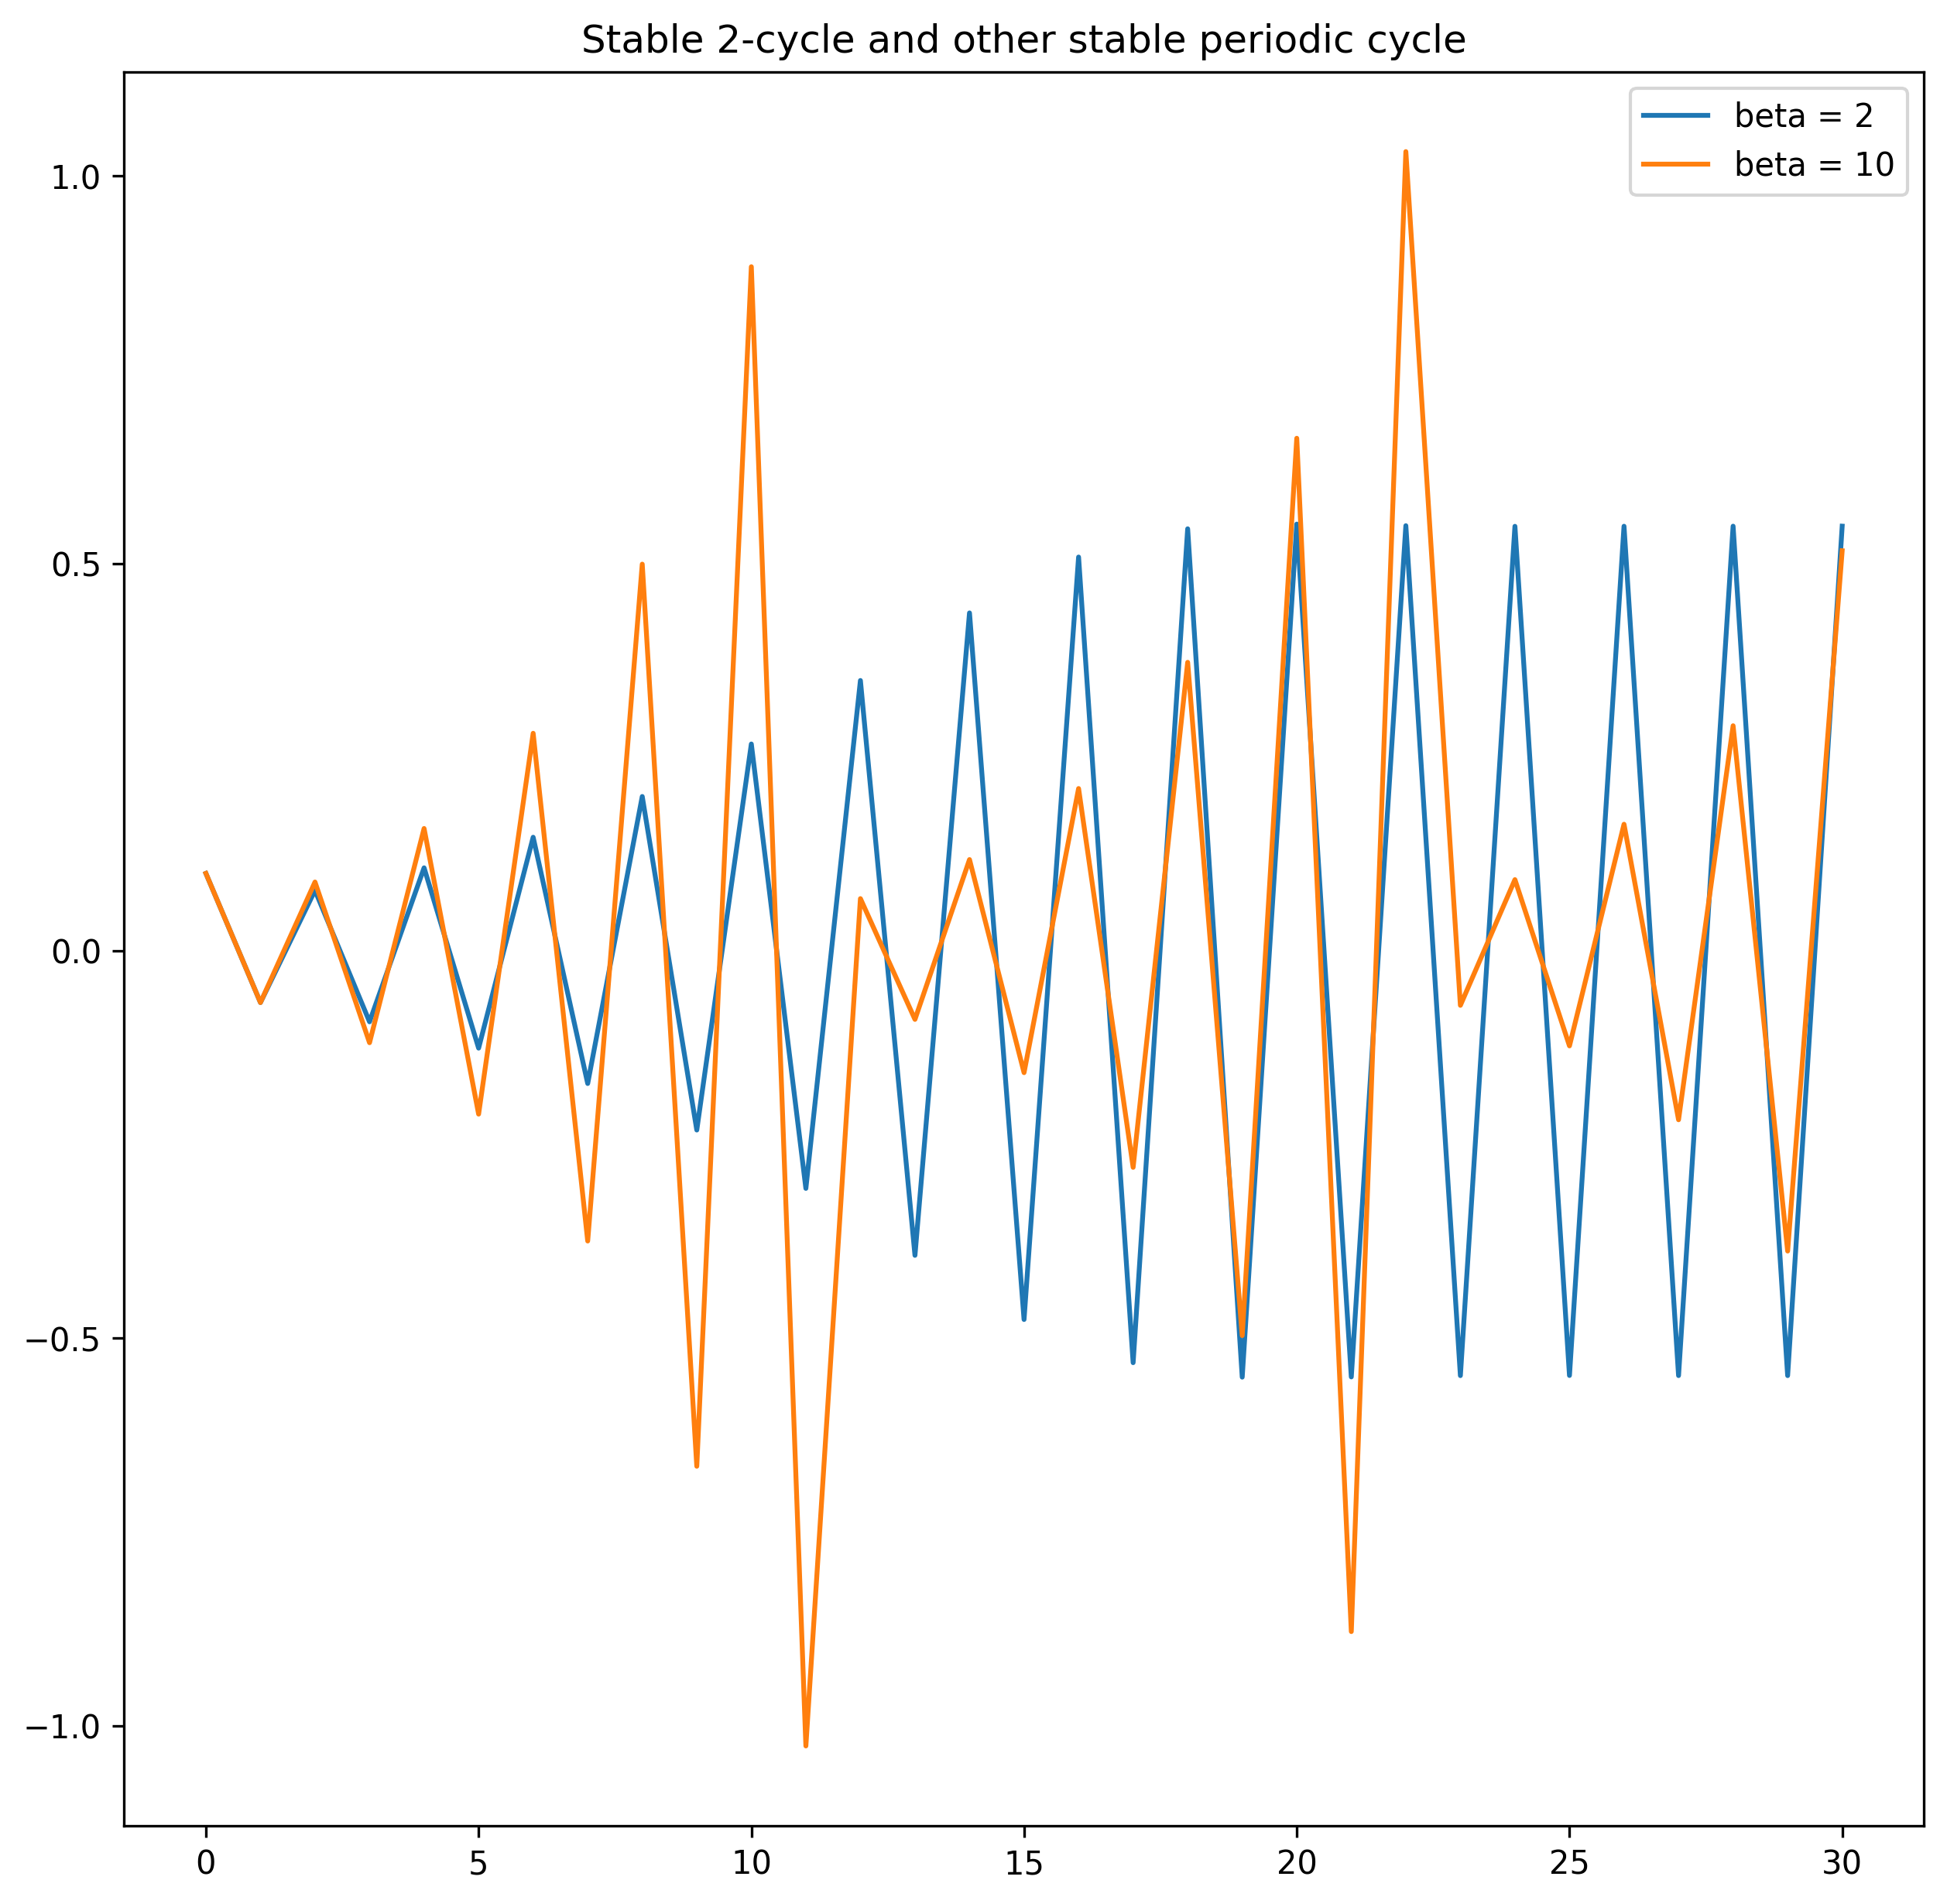

In [8]:
# Stable steady state
cwmodel1 = CobWebModel(start_price = 0.1, beta=2.0, s=1)
cwmodel1.add_agent(Naive(), .5)
cwmodel1.add_agent(Fundamentalist(), .5)

cwmodel2 = CobWebModel(start_price = 0.1, beta=10, s=1)
cwmodel2.add_agent(Naive(), 0.5)
cwmodel2.add_agent(Fundamentalist(), 0.5)

for i in range(30):
    cwmodel1.step()
    cwmodel2.step()

plt.figure(figsize=(10,10), dpi=300)
plt.title('Stable 2-cycle and other stable periodic cycle')
plt.plot(cwmodel1.prices, label = 'beta = 2')
plt.plot(cwmodel2.prices, label = 'beta = 10')
plt.legend()
plt.savefig('figures_2/d_cycles.png')
plt.show()

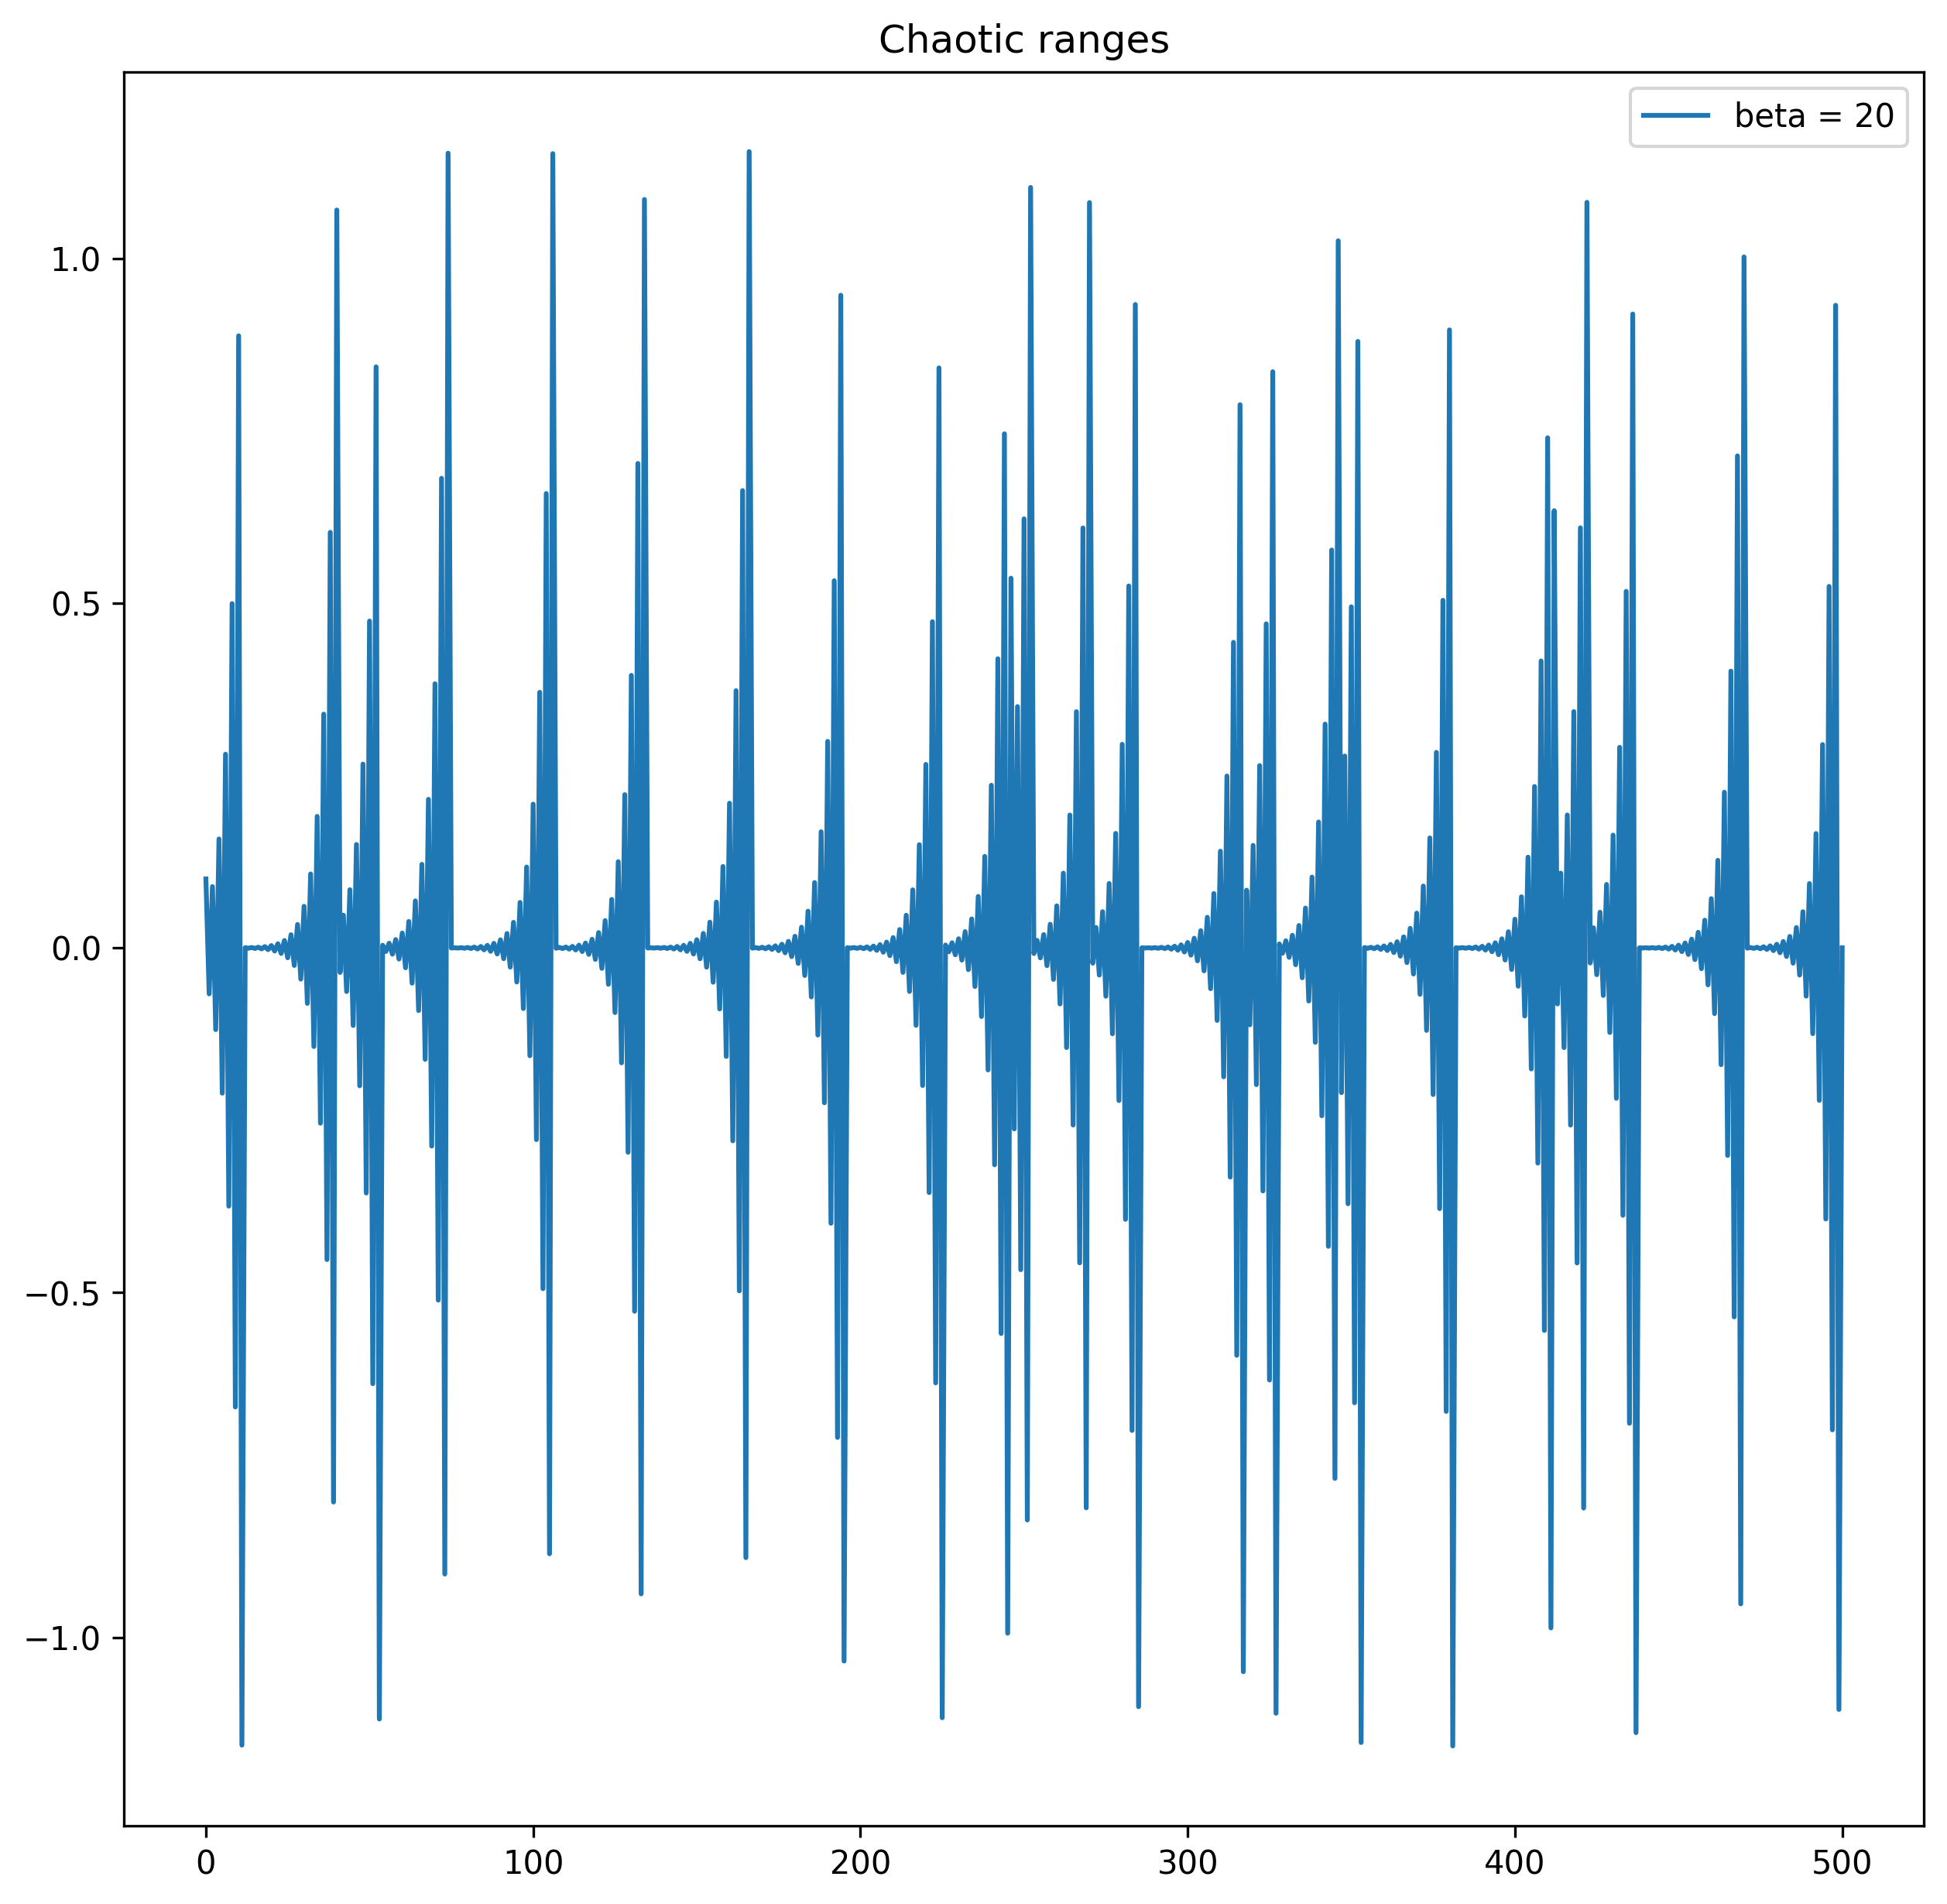

In [11]:
# Chaotic
cwmodel1 = CobWebModel(start_price = 0.1, beta=20, s=1)
cwmodel1.add_agent(Naive(), .5)
cwmodel1.add_agent(Fundamentalist(), .5)


for i in range(500):
    cwmodel1.step()

plt.figure(figsize=(10,10), dpi=300)    
plt.title('Chaotic ranges')
plt.plot(cwmodel1.prices, label = 'beta = 20')
plt.legend()
plt.savefig('figures_2/d_chaos.png')
plt.show()

## E

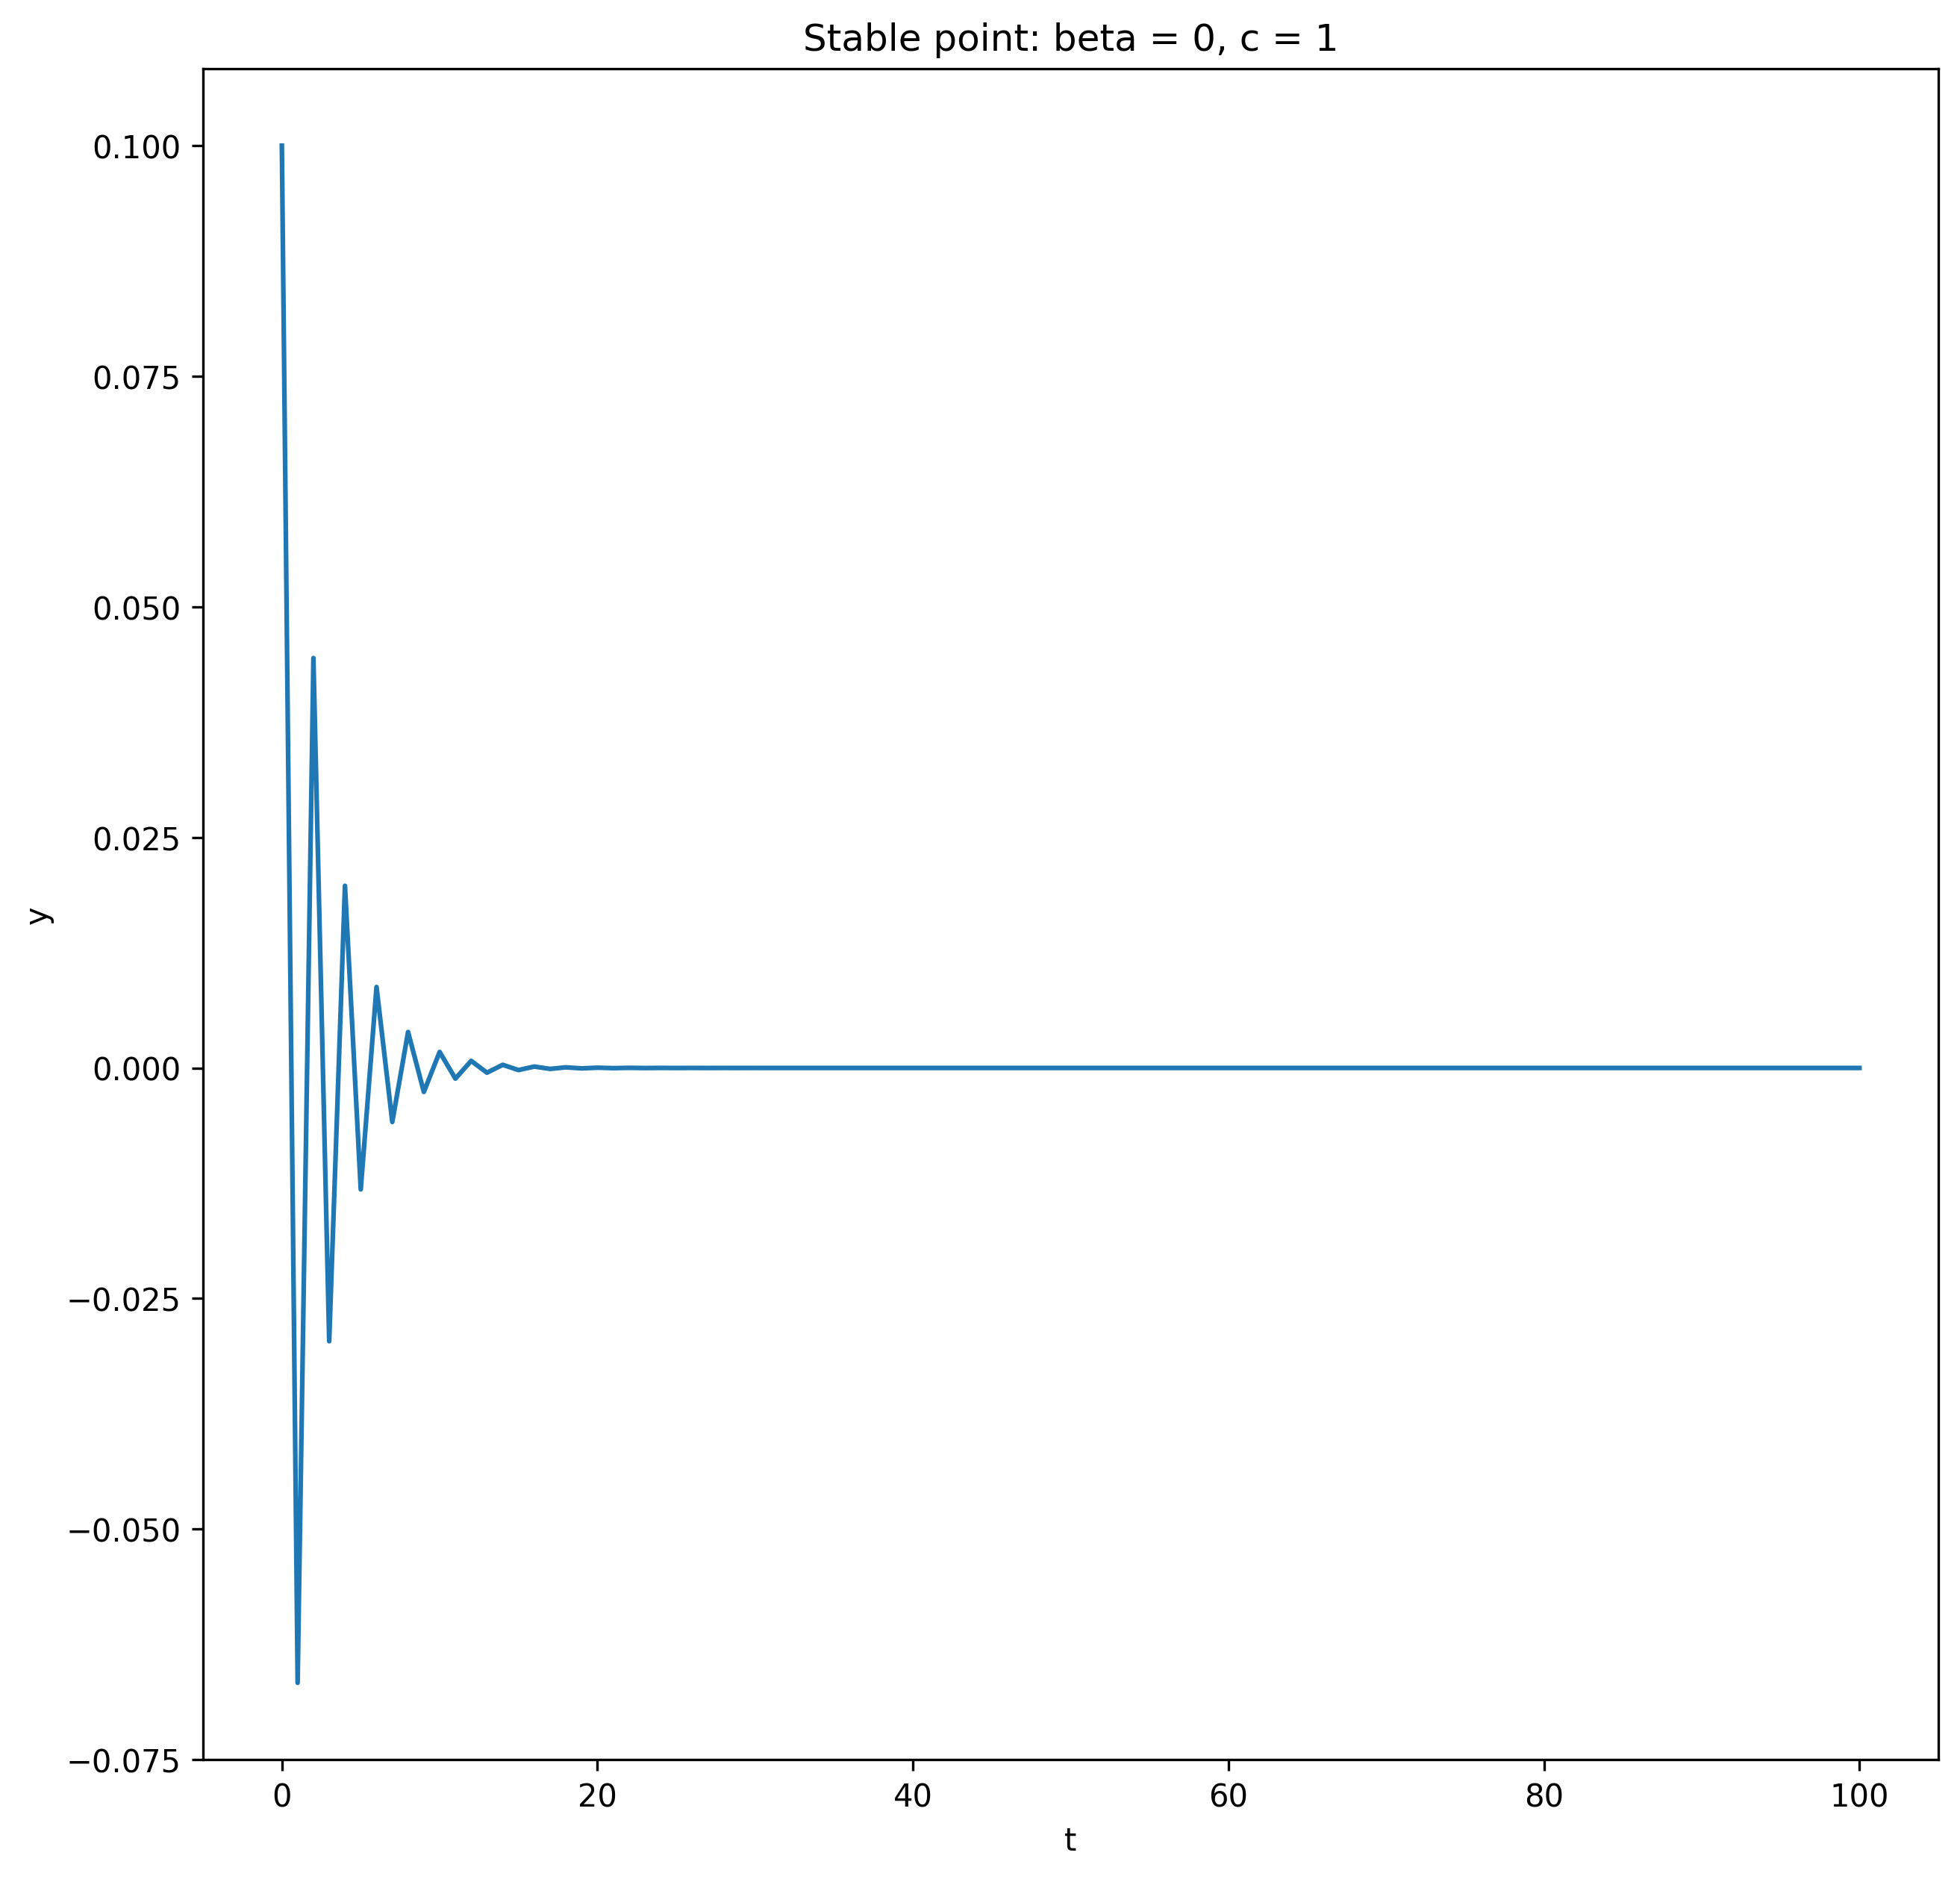

In [18]:
beta = 0
c = 1

cwmodel = CobWebModel(start_price = 0.1, beta=beta, s=1)
cwmodel.add_agent(Naive(c=c), .5)
cwmodel.add_agent(Fundamentalist(c=c), .5)


for i in range(100):
    cwmodel.step()


plt.figure(figsize=(10,10), dpi=300)    
plt.plot(cwmodel.prices)
plt.title(f"Stable point: beta = {beta}, c = {c}")
plt.xlabel('t')
plt.ylabel('y')
plt.savefig('figures_2/Estable.png')
plt.show()

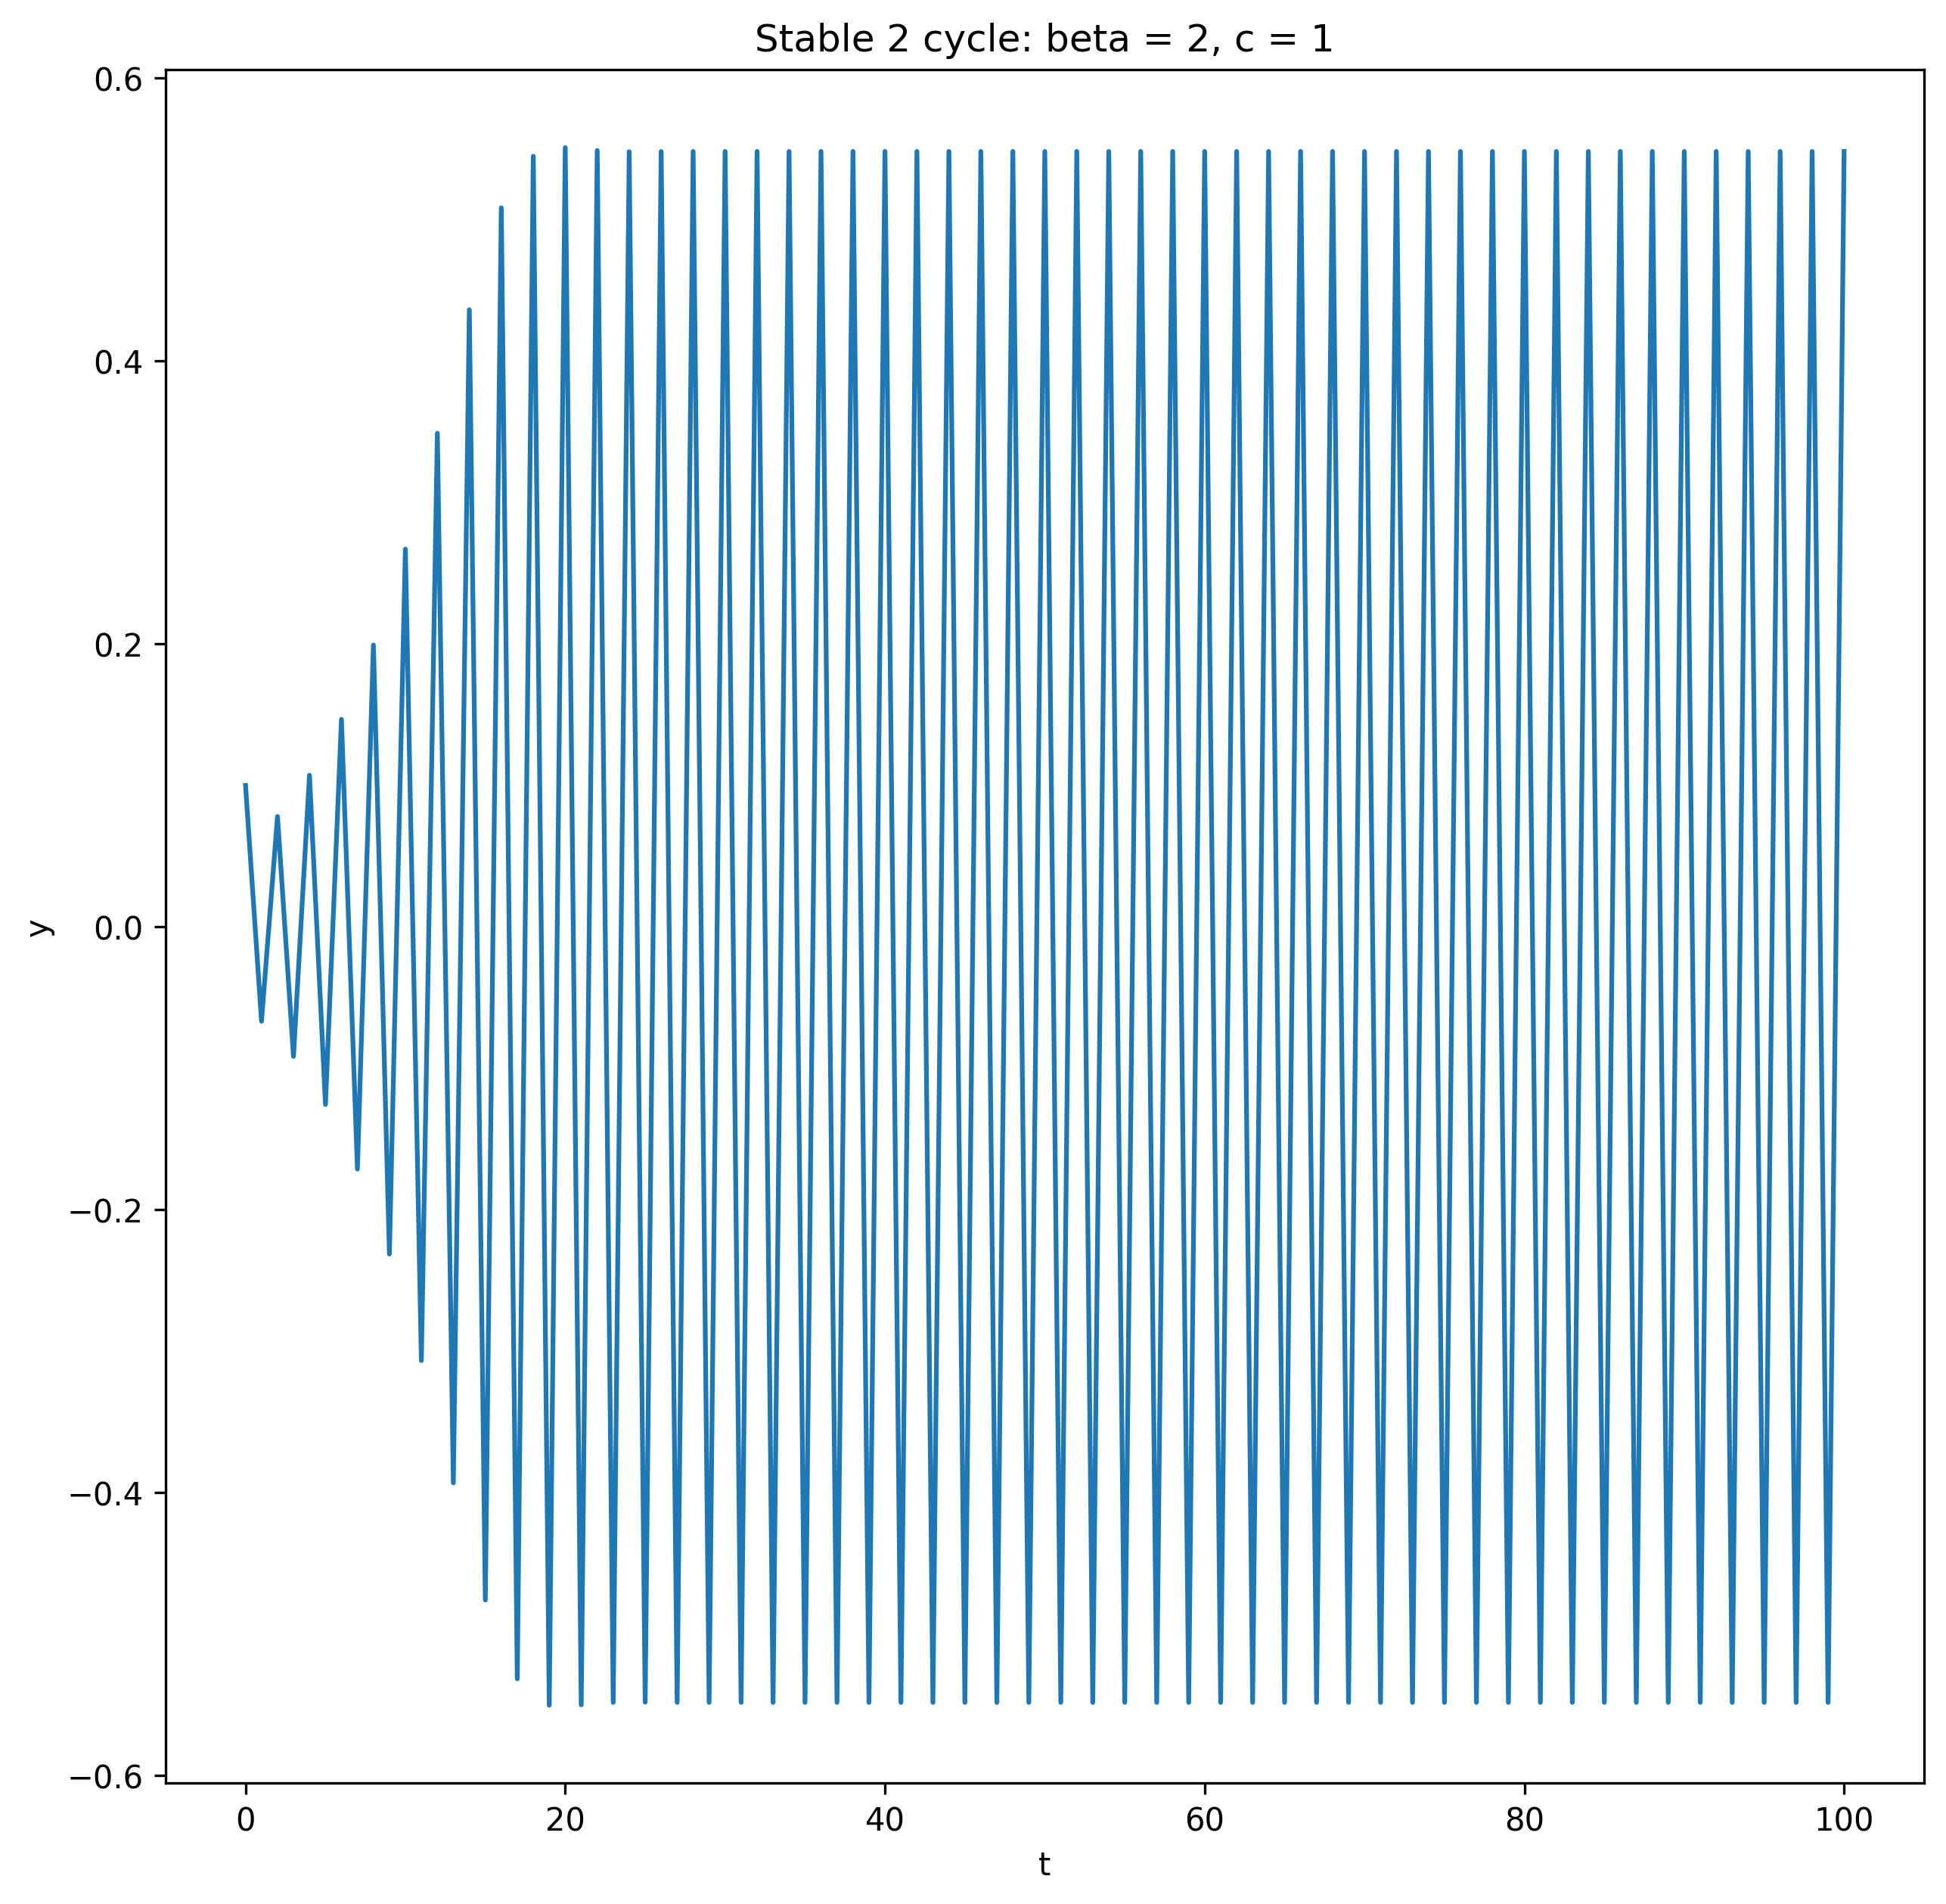

In [59]:
beta = 2
c = 1

cwmodel = CobWebModel(start_price = 0.1, beta=beta, s=1)
cwmodel.add_agent(Naive(), .5)
cwmodel.add_agent(Fundamentalist(c=c), .5)


for i in range(100):
    cwmodel.step()

plt.figure(figsize=(10,10), dpi=300)    
plt.plot(cwmodel.prices)
plt.title(f"Stable 2 cycle: beta = {beta}, c = {c}")
plt.xlabel('t')
plt.ylabel('y')
plt.savefig('figures_2/E_periodic.png')
plt.show()

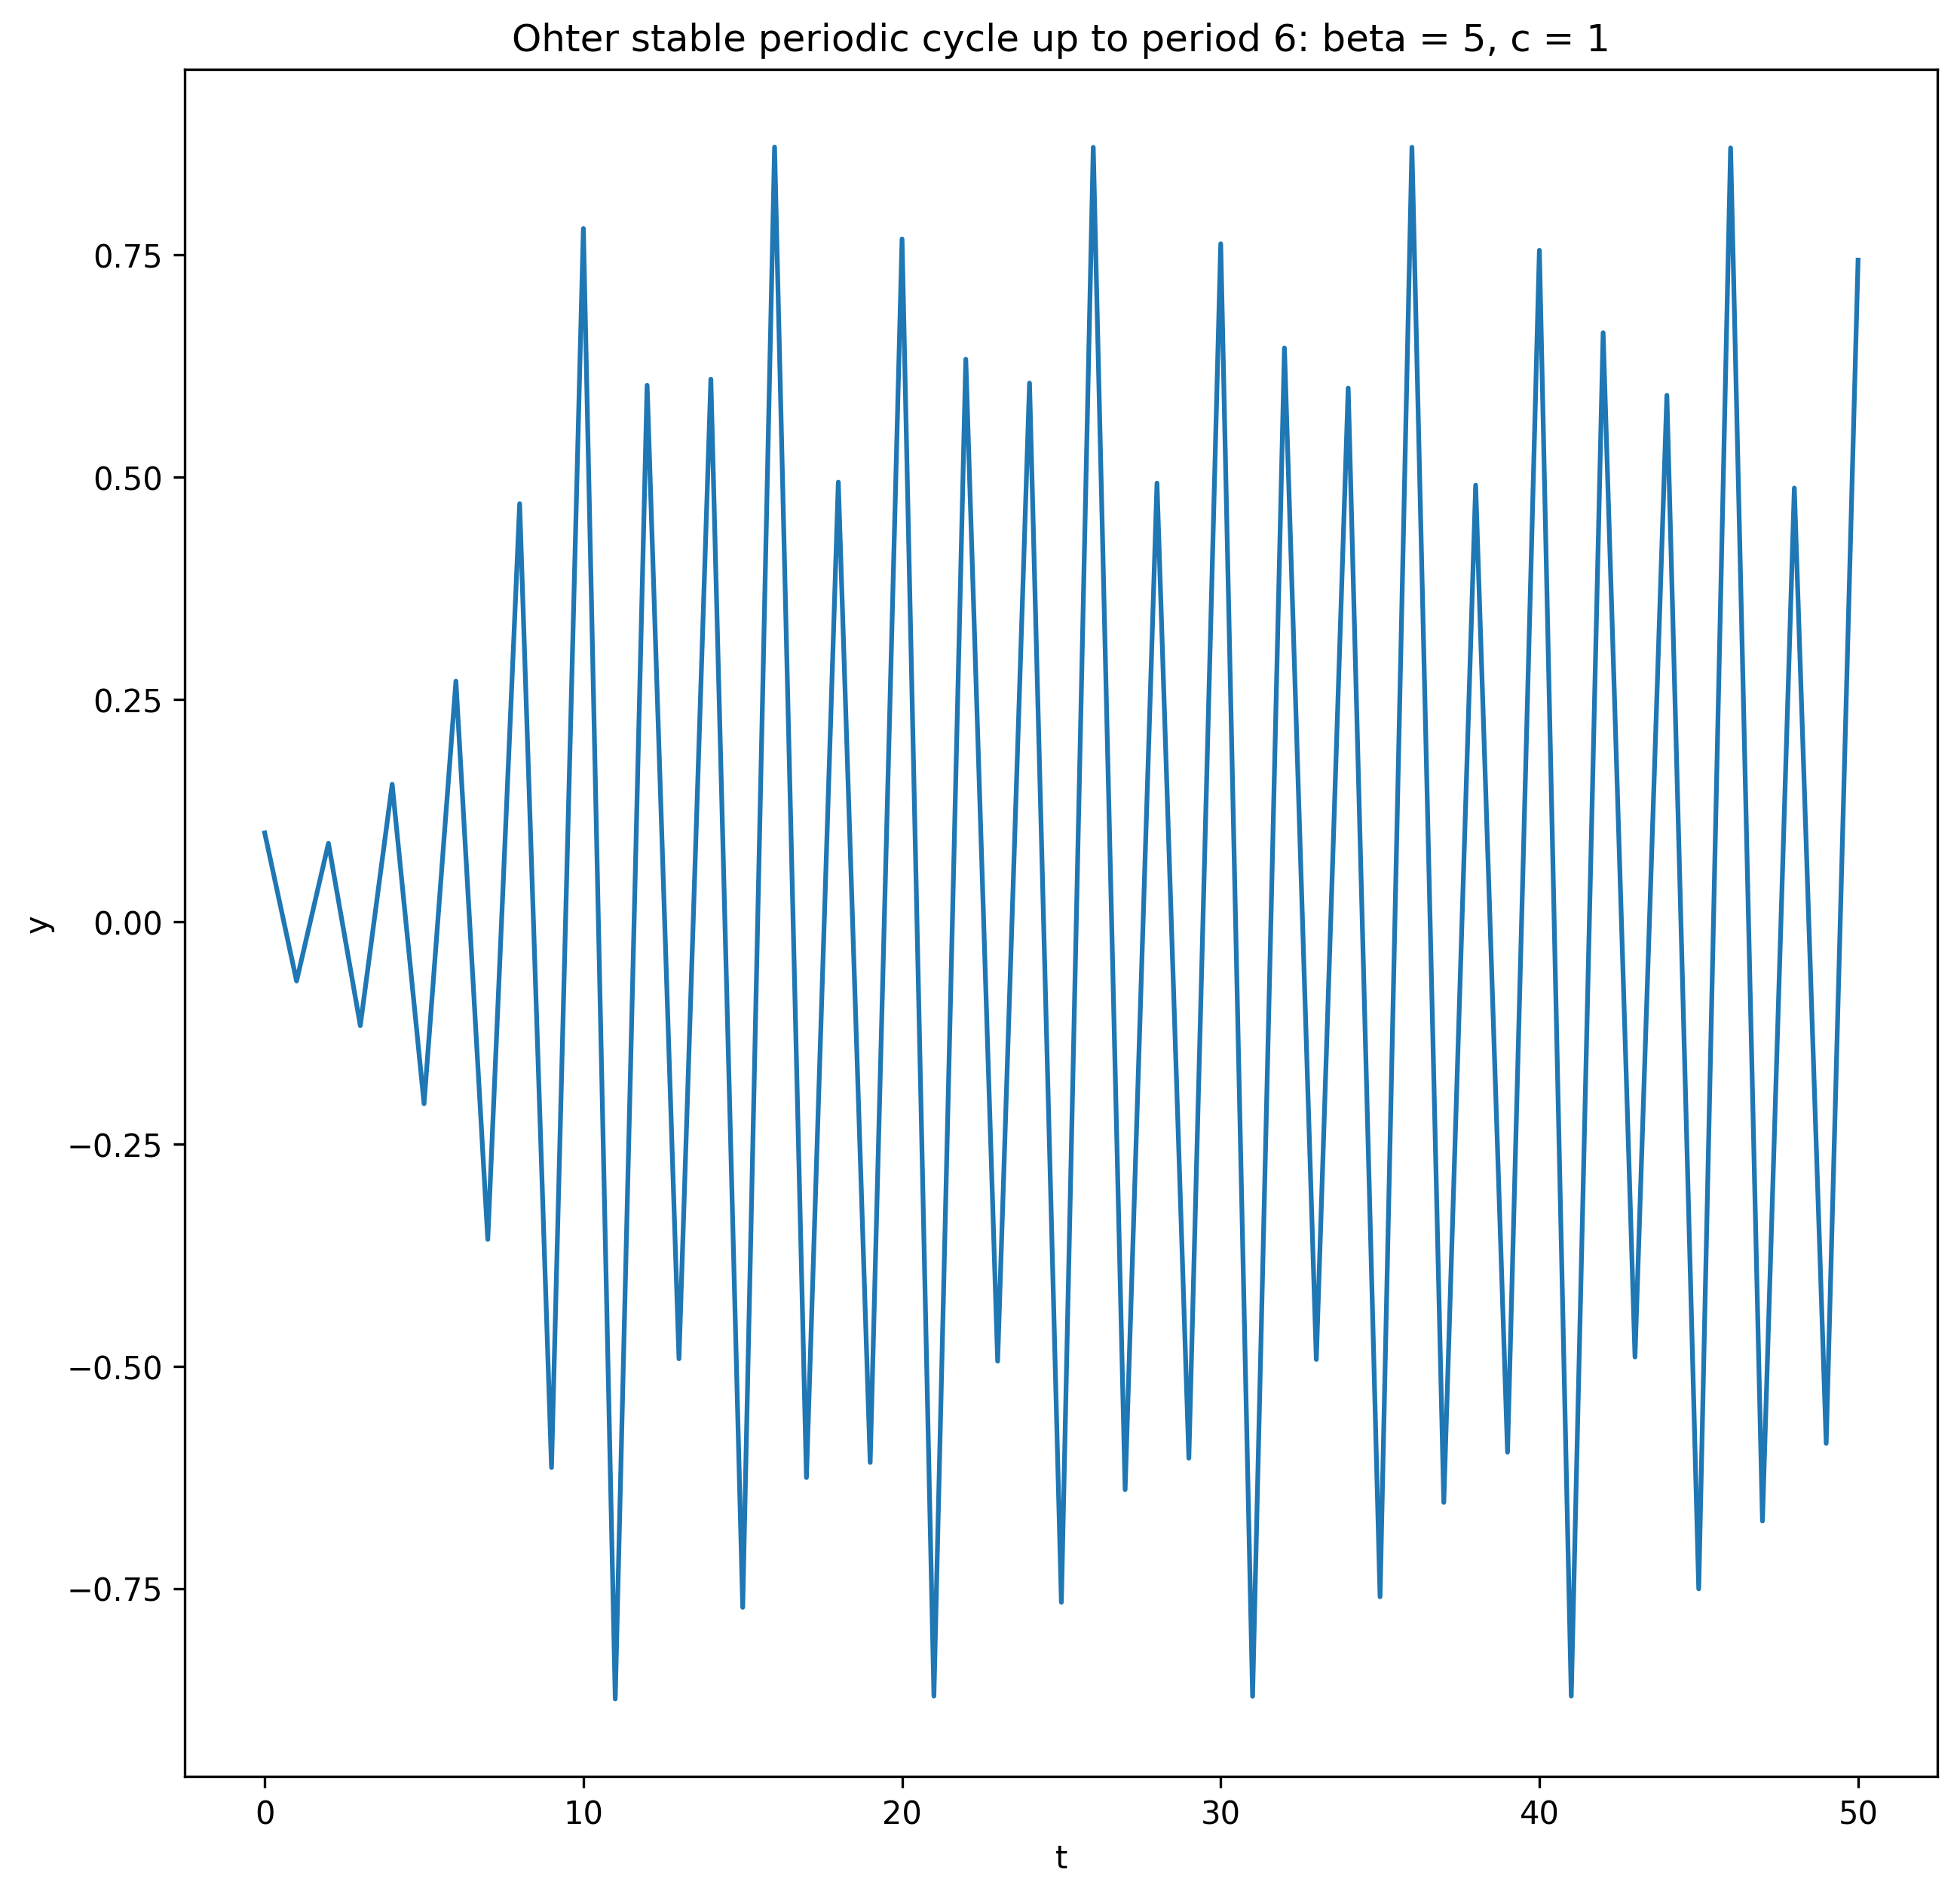

In [61]:
beta = 5
c = 1

cwmodel = CobWebModel(start_price = 0.1, beta=beta, s=1)
cwmodel.add_agent(Naive(), .5)
cwmodel.add_agent(Fundamentalist(c=c), .5)


for i in range(50):
    cwmodel.step()


plt.figure(figsize=(10,10), dpi=300)    
plt.plot(cwmodel.prices)
plt.title(f"Ohter stable periodic cycle up to period 6: beta = {beta}, c = {c}")
plt.xlabel('t')
plt.ylabel('y')
plt.savefig('figures_2/E_2periodic.png')
plt.show()

# F: Strange attractor

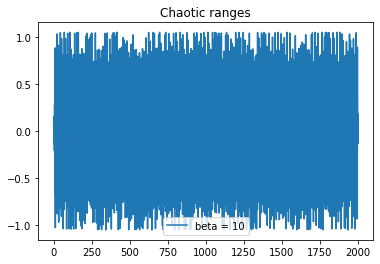

In [15]:
beta=10

# Chaotic
cwmodel1 = CobWebModel(start_price = 0.1, beta= beta, s=1)
cwmodel1.add_agent(Naive(), .5)
cwmodel1.add_agent(Fundamentalist(), .5)


for i in range(2000):
    cwmodel1.step()

plt.title('Chaotic ranges')
plt.plot(cwmodel1.prices, label = f'beta = {beta}')
plt.legend()
plt.show()

In [16]:
list1 = cwmodel1.prices[0:-2]
list2 = cwmodel1.prices[1:-1]

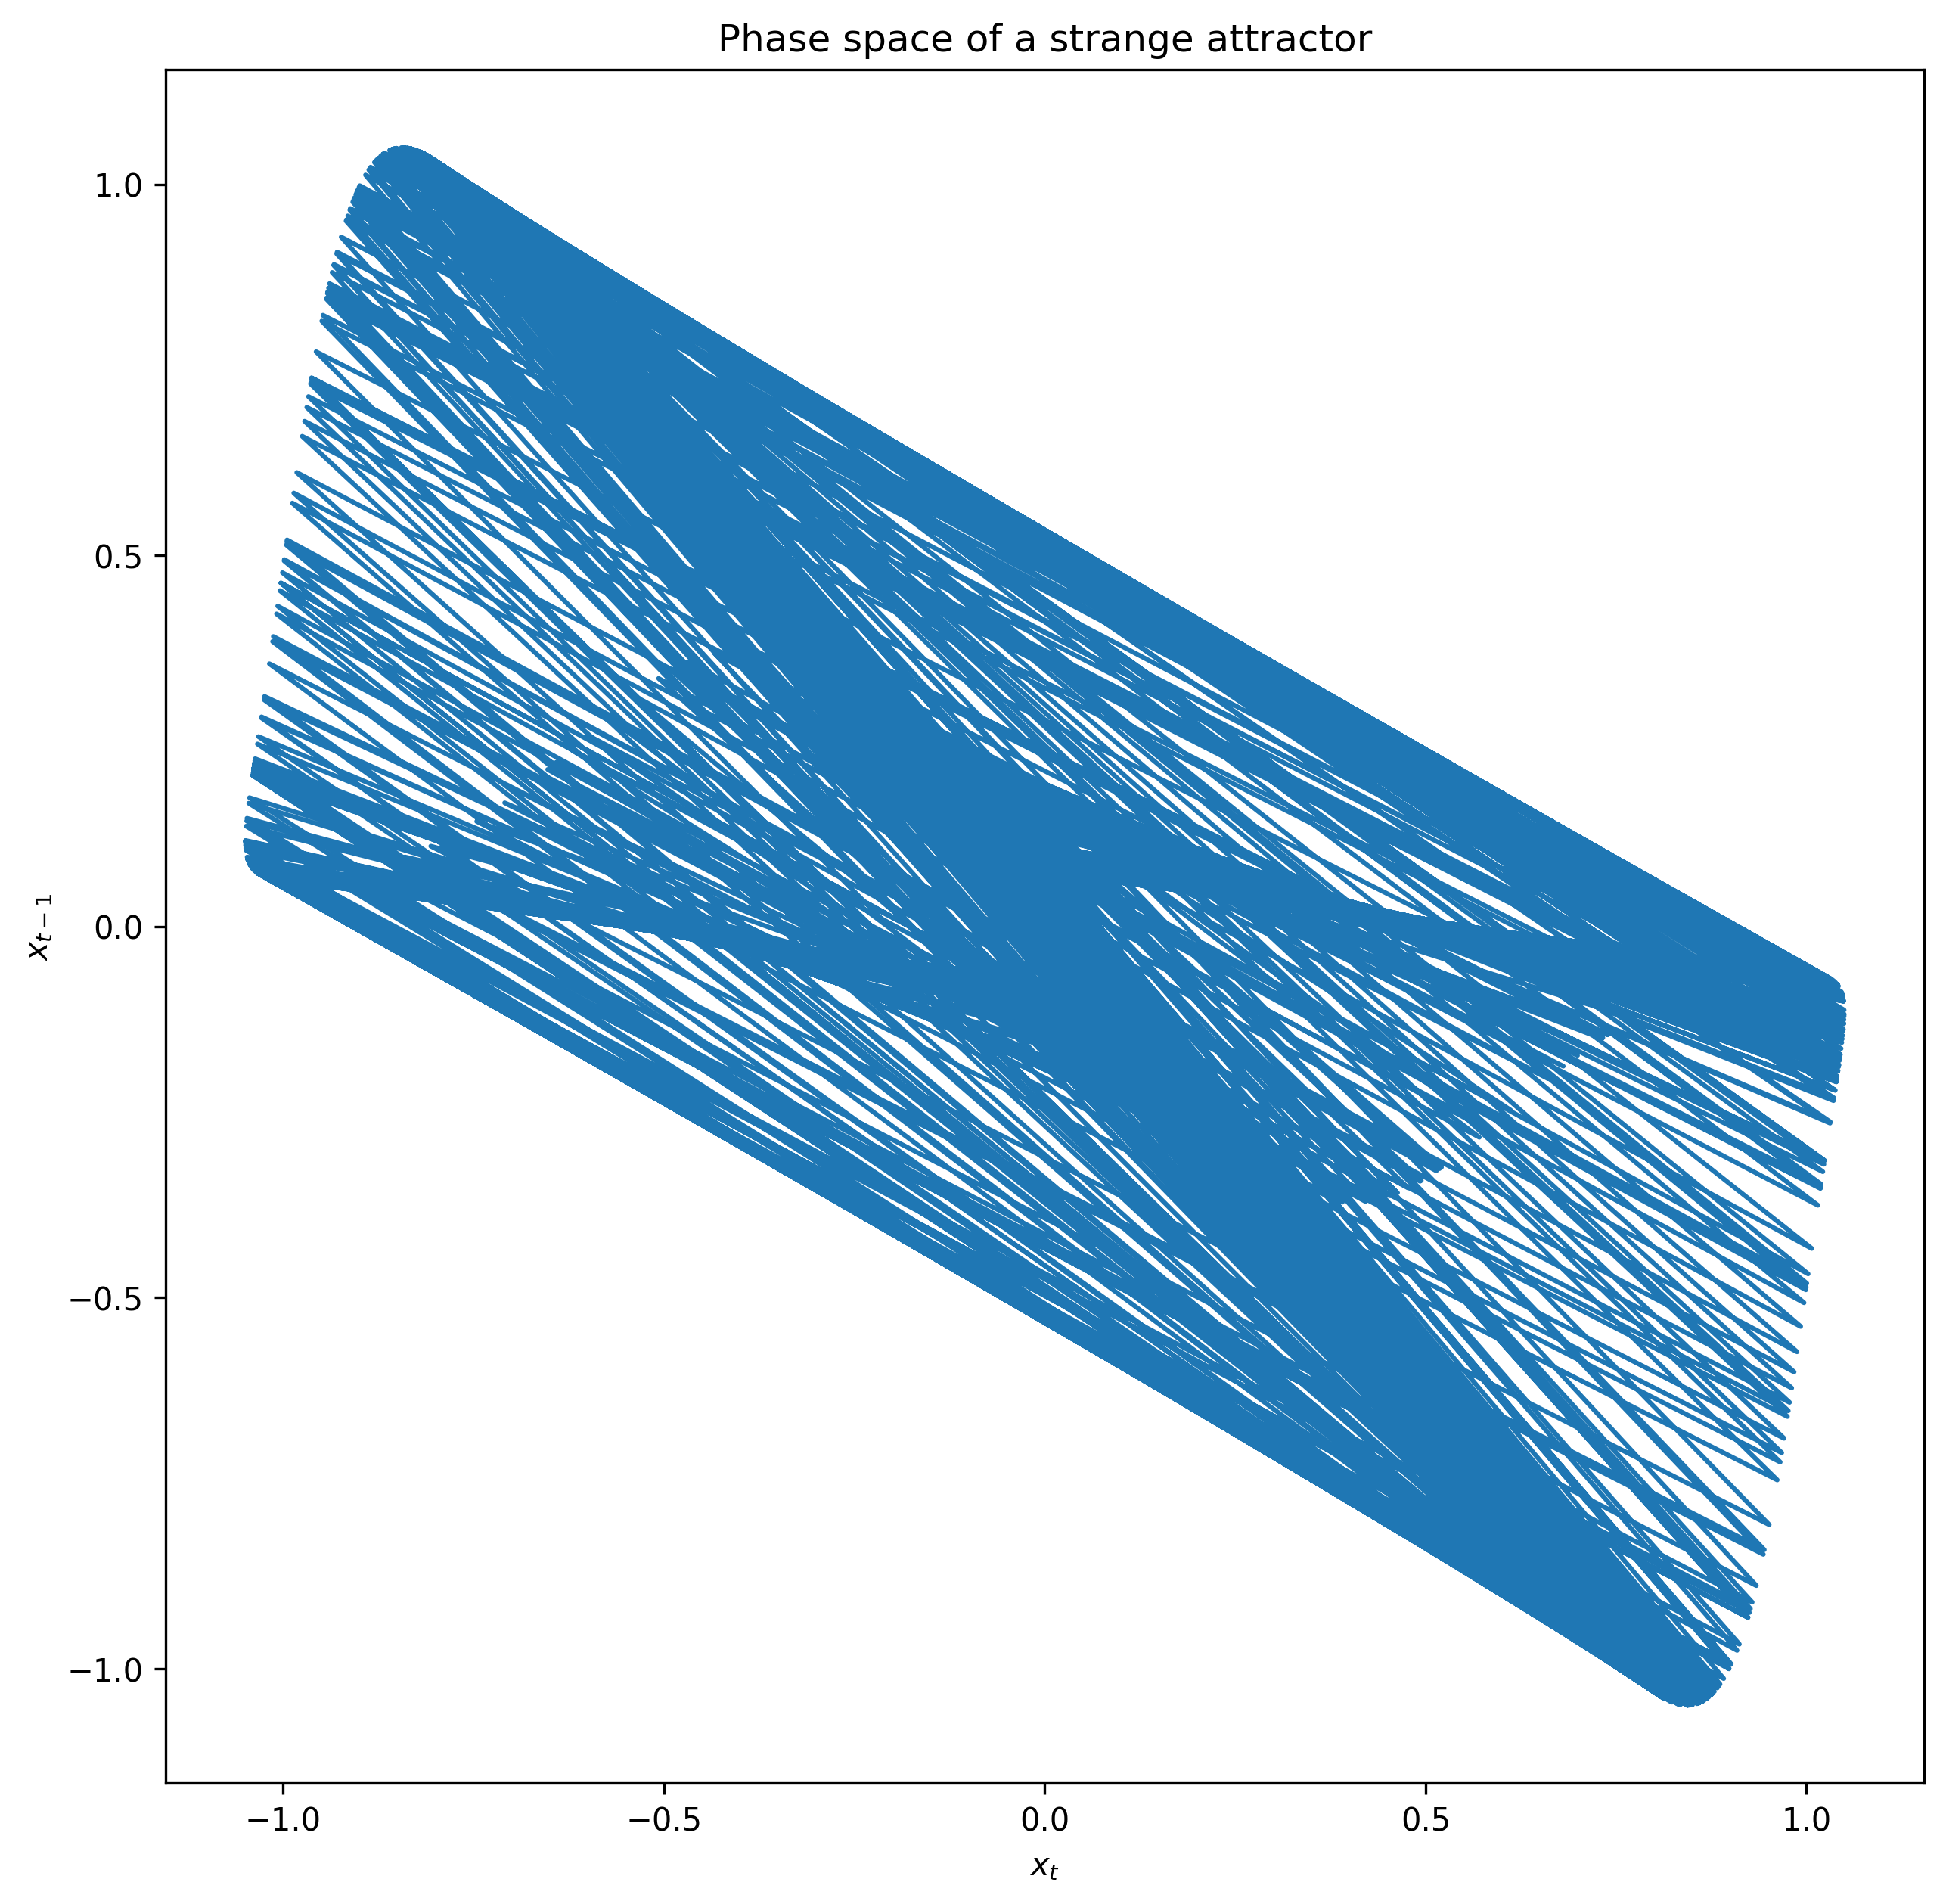

In [17]:
plt.figure(figsize=(10,10), dpi=300)    
plt.title('Phase space of a strange attractor')
plt.plot(list1, list2)
plt.xlabel('$x_t$')
plt.ylabel('$x_{t-1}$')
#plt.savefig('figures_2/f_strange.png')
plt.show()

## G: Periodic Cycles

In [162]:
# Chaotic
cwmodel1 = CobWebModel(start_price = .1, beta= 10, s=-4/4)
cwmodel1.add_agent(Naive(), .5)
cwmodel1.add_agent(Fundamentalist(), .5)


for i in range(200):
    cwmodel1.step()

first_list1 = cwmodel1.prices[0:-2]
first_list2 = cwmodel1.prices[1:-1]


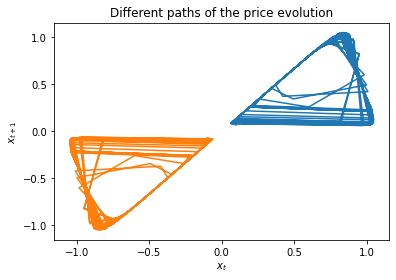

In [164]:
# Chaotic
cwmodel1 = CobWebModel(start_price = -.1, beta= 10, s=-4/4)
cwmodel1.add_agent(Naive(), .5)
cwmodel1.add_agent(Fundamentalist(), .5)


for i in range(200):
    cwmodel1.step()

    
second_list1 = cwmodel1.prices[0:-2]
second_list2 = cwmodel1.prices[1:-1]

plt.plot(first_list1, first_list2)
plt.plot(second_list1, second_list2)
plt.xlabel('$x_t$')
plt.ylabel('$x_{t+1}$')
plt.title("Different paths of the price evolution")
plt.savefig("figures/hw2/paths.pdf", dpi=300)
plt.show()

## H: Adaptive learners

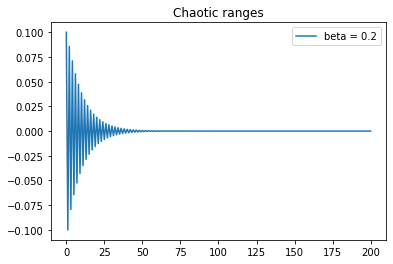

In [168]:
beta=.2

cwmodel1 = CobWebModel(start_price = .1, beta= beta)
cwmodel1.add_agent(Naive(), .5)
cwmodel1.add_agent(Adaptive(), .5)

for i in range(200):
    cwmodel1.step()

plt.title('Chaotic ranges')
plt.plot(cwmodel1.prices, label = f'beta = {beta}')
plt.legend()
plt.show()

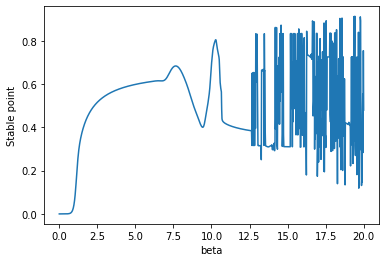

In [174]:
data = []
betas = np.linspace(0,20,1000)
for b in betas:

    cwmodel = CobWebModel(start_price = 0.1, beta=b, s=1)
    cwmodel.add_agent(Naive(), .5)
    cwmodel.add_agent(Adaptive(), .5)

    for ii in range(100):
        cwmodel.step()
        
    data.append(cwmodel.prices[-1])
    
plt.plot(betas, data)
plt.xlabel('beta')
plt.ylabel('Stable point')
plt.savefig('figures/hw2/adaptive.pdf', dpi=300)
plt.show()

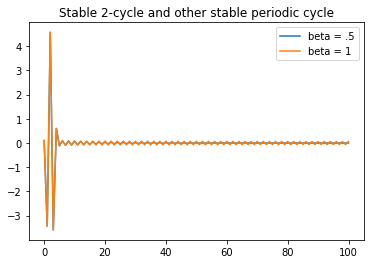

In [184]:
# Stable steady state
cwmodel1 = CobWebModel(start_price = 0.1, beta=.5, s=1)
cwmodel1.add_agent(Naive(), .5)
cwmodel1.add_agent(Adaptive(), .5)

cwmodel2 = CobWebModel(start_price = 0.1, beta=1, s=1)
cwmodel2.add_agent(Naive(), 0.5)
cwmodel2.add_agent(Adaptive(), 0.5)

for i in range(100):
    cwmodel1.step()
    cwmodel2.step()

plt.title('Stable 2-cycle and other stable periodic cycle')
plt.plot(cwmodel1.prices, label = 'beta = .5')
plt.plot(cwmodel2.prices, label = 'beta = 1')
plt.legend()
plt.show()

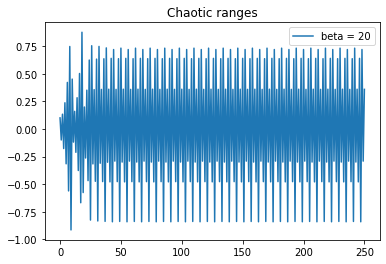

In [212]:
# Chaotic
cwmodel1 = CobWebModel(start_price = 0.1, beta=20, s=1)
cwmodel1.add_agent(Naive(), .5)
cwmodel1.add_agent(Adaptive(c=0.5), .5)


for i in range(250):
    cwmodel1.step()

plt.title('Chaotic ranges')
plt.plot(cwmodel1.prices, label = 'beta = 20')
plt.legend()
plt.savefig("figures/hw2/adaptive_chaos.pdf", dpi=300)
plt.show()